In [1]:
#Data set exploration
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

Data for MMA survey

In [48]:
df = pd.read_excel('fs_amva.xlsx')
df

,AÑO_ENCU,Nlista,ZonaAMVA,Mu,Descripción CIIU,Grupo(Division),Macrogrupo,DescMG,NOMESTABLECIMIENTO,Horas Abierto,N Total empleaos,Tamaño estaBlecimiento,AreaT,Tiene Bodega,AreaBodega,Tiene Estacionamiento,TminutosParqueo,Viajes semanales,Kilogramos semanales
0,2012,26,Medellin,10,472-Comercio al por menor de alimentos (vívere...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,ALIMENTOS FRUVEX LTDA,9,4.0,Micro,250,1,2.0,1,23.333333,2.25,70.0000
1,2012,46,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,LOTERO CARVAJAL FABIO DE JESUS,10,3.0,Micro,60,0,0.0,1,15.000000,8.00,1350.0000
2,2012,102,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,CORREA BETANCUR RUBEN DARIO,10,1.0,Micro,10,0,0.0,1,5.000000,0.50,3.4375
3,2012,277,Medellin,10,464-Comercio al por mayor de artículos y enser...,46,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,RUIZ DIEGO FERNANDO,10,2.0,Micro,25,0,0.0,1,5.000000,3.75,0.1250
4,2012,294,Medellin,10,869-Otras actividades de atención relacionadas...,86,Q,Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...,LOPEZ VELEZ MARIA MERCEDES,14,5.0,Micro,160,0,0.0,1,5.000000,0.25,7.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,2018,1001185,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,FERRETERIA NATO,12,4.0,Mediana,28,1,0.0,1,60.000000,2.00,325.0000
4357,2018,1001186,Medellin,10,Comercio al por menor en puestos de venta móviles,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,OCHO OCHO LICORES,18,3.0,Micro,15,1,0.0,1,21.666667,3.00,53.3750
4358,2018,1001187,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DEPOSITO Y FERRETERIA,9,4.0,Mediana,40,1,0.0,1,31.666667,3.00,472.5000
4359,2018,1001188,Medellin,10,Comercio al por menor de otros enseres domésti...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DONDE RENE,14,1.0,Micro,15,1,0.0,1,12.500000,2.00,7.2500


In [49]:
print(df.columns)

Index(['AÑO_ENCU', 'Nlista', 'ZonaAMVA', 'Mu', 'Descripción CIIU ',
       'Grupo(Division)', 'Macrogrupo', 'DescMG', 'NOMESTABLECIMIENTO',
       'Horas Abierto', 'N Total empleaos', 'Tamaño estaBlecimiento', 'AreaT',
       'Tiene Bodega', 'AreaBodega', 'Tiene Estacionamiento',
       'TminutosParqueo', 'Viajes semanales', 'Kilogramos semanales'],
      dtype='object')


In [51]:
# Define a dictionary for translating column names
translation_dict = {
    'AÑO_ENCU': 'Year',
    'Nlista': 'List Number',
    'ZonaAMVA': 'AMVA Zone',
    'Mu': 'Mu',
    'Descripción CIIU ': 'ISIC Description',
    'Grupo(Division)': 'Division Group',
    'Macrogrupo': 'Macrogroup',
    'DescMG': 'MG Description',
    'NOMESTABLECIMIENTO': 'Establishment Name',
    'Horas Abierto': 'Hours Open',
    'N Total empleaos': 'Total Employees',
    'Tamaño estaBlecimiento': 'Establishment Size',
    'AreaT': 'Total Area',
    'Tiene Bodega': 'Has Warehouse',
    'AreaBodega': 'Warehouse Area',
    'Tiene Estacionamiento': 'Has Parking',
    'TminutosParqueo': 'Parking Minutes',
    'Viajes semanales': 'Weekly Trips',
    'Kilogramos semanales': 'Weekly Kilograms'
}


# Rename columns using the translation dictionary
df = df.rename(columns=translation_dict)

# Display the DataFrame with translated column names
df

,Year,List Number,AMVA Zone,Mu,ISIC Description,Division Group,Macrogroup,MG Description,Establishment Name,Hours Open,Total Employees,Establishment Size,Total Area,Has Warehouse,Warehouse Area,Has Parking,Parking Minutes,Weekly Trips,Weekly Kilograms
0,2012,26,Medellin,10,472-Comercio al por menor de alimentos (vívere...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,ALIMENTOS FRUVEX LTDA,9,4.0,Micro,250,1,2.0,1,23.333333,2.25,70.0000
1,2012,46,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,LOTERO CARVAJAL FABIO DE JESUS,10,3.0,Micro,60,0,0.0,1,15.000000,8.00,1350.0000
2,2012,102,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,CORREA BETANCUR RUBEN DARIO,10,1.0,Micro,10,0,0.0,1,5.000000,0.50,3.4375
3,2012,277,Medellin,10,464-Comercio al por mayor de artículos y enser...,46,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,RUIZ DIEGO FERNANDO,10,2.0,Micro,25,0,0.0,1,5.000000,3.75,0.1250
4,2012,294,Medellin,10,869-Otras actividades de atención relacionadas...,86,Q,Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...,LOPEZ VELEZ MARIA MERCEDES,14,5.0,Micro,160,0,0.0,1,5.000000,0.25,7.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,2018,1001185,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,FERRETERIA NATO,12,4.0,Mediana,28,1,0.0,1,60.000000,2.00,325.0000
4357,2018,1001186,Medellin,10,Comercio al por menor en puestos de venta móviles,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,OCHO OCHO LICORES,18,3.0,Micro,15,1,0.0,1,21.666667,3.00,53.3750
4358,2018,1001187,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DEPOSITO Y FERRETERIA,9,4.0,Mediana,40,1,0.0,1,31.666667,3.00,472.5000
4359,2018,1001188,Medellin,10,Comercio al por menor de otros enseres domésti...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DONDE RENE,14,1.0,Micro,15,1,0.0,1,12.500000,2.00,7.2500


## Data for Food Service establishments

Categories of CIIU 561 and 563

In [52]:
df.columns

Index(['Year', 'List Number', 'AMVA Zone', 'Mu', 'ISIC Description',
       'Division Group', 'Macrogroup', 'MG Description', 'Establishment Name',
       'Hours Open', 'Total Employees', 'Establishment Size', 'Total Area',
       'Has Warehouse', 'Warehouse Area', 'Has Parking', 'Parking Minutes',
       'Weekly Trips', 'Weekly Kilograms'],
      dtype='object')

In [53]:
# Fill NaN values in 'Descripción CIIU' column with an empty string
df['ISIC Description'] = df['ISIC Description'].fillna('')

# Create a boolean mask to filter rows
# Categories 561 and 563 corresponds to the FS
mask = df['ISIC Description'].str.contains(r'\b(?:561|563)-', regex=True)

# Use the mask to filter the DataFrame
fs_df = df[mask]

# Now, filtered_df contains rows where the 'Descripción CIIU' column contains 561 or 563 followed by a hyphen.
print(len(fs_df))

266


* Descriptive analysis

In [153]:
numeric_colums=['Hours Open', 'Total Employees', 'Total Area',
        'Warehouse Area', 'Parking Minutes',
       'Weekly Trips', 'Weekly Kilograms']
numeric_fs_df=fs_df[numeric_colums]
numeric_fs_df = numeric_fs_df.apply(pd.to_numeric, errors='coerce')
numeric_fs_df.describe().round(2)

,Hours Open,Total Employees,Total Area,Warehouse Area,Parking Minutes,Weekly Trips,Weekly Kilograms
count,266.00,266.00,266.00,266.00,266.00,266.00,266.00
mean,12.39,3.65,79.28,34.54,11.51,6.69,644.78
std,4.33,4.15,132.95,73.09,6.54,6.74,1640.97
min,4.00,1.00,4.00,0.00,1.00,0.25,1.10
25%,10.00,2.00,25.00,0.00,7.50,3.00,117.75
50%,12.00,3.00,45.00,16.00,10.00,5.00,255.90
75%,14.00,4.00,80.00,48.00,15.00,8.75,532.69
max,24.00,42.00,1450.00,1000.00,36.67,73.00,17610.00


In [77]:
numeric_fs_df

,Hours Open,Total Employees,Total Area,Warehouse Area,Parking Minutes,Weekly Trips,Weekly Kilograms
25,10,4.0,120,10.0,15.000000,1.50,900.00
773,16,6.0,100,10.0,10.348837,11.00,300.00
809,10,1.0,60,15.0,6.833333,5.00,9.50
836,9,6.0,80,0.0,14.000000,0.75,47.50
873,10,1.0,4,0.0,13.333333,1.25,350.00
...,...,...,...,...,...,...,...
4236,11,4.0,130,130.0,15.000000,4.00,240.00
4237,10,4.0,80,80.0,2.000000,11.50,359.50
4243,4,3.0,25,25.0,15.000000,4.00,295.00
4354,13,4.0,70,0.0,27.500000,3.00,69.75


In [78]:
# Check for negative values in each column
negative_values = numeric_fs_df.applymap(lambda x: x < 0)

# Print the results
print(negative_values)

      Hours Open  Total Employees  Total Area  Warehouse Area  \
25         False            False       False           False   
773        False            False       False           False   
809        False            False       False           False   
836        False            False       False           False   
873        False            False       False           False   
...          ...              ...         ...             ...   
4236       False            False       False           False   
4237       False            False       False           False   
4243       False            False       False           False   
4354       False            False       False           False   
4355       False            False       False           False   

      Parking Minutes  Weekly Trips  Weekly Kilograms  
25              False         False             False  
773             False         False             False  
809             False         False             Fal

* Box plots of the numeric columsn

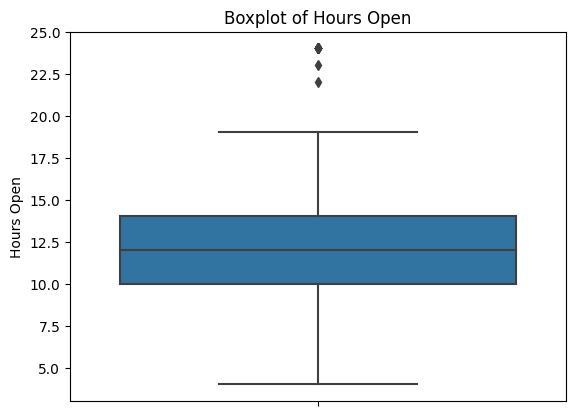

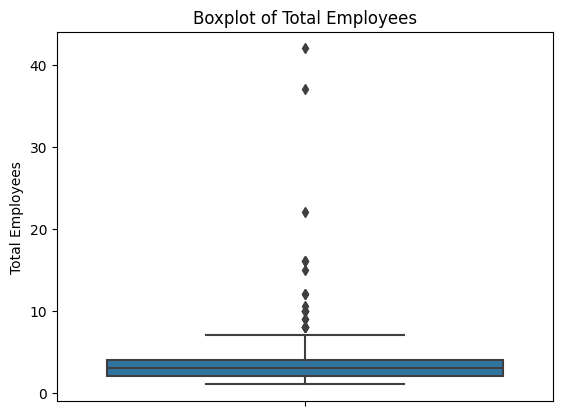

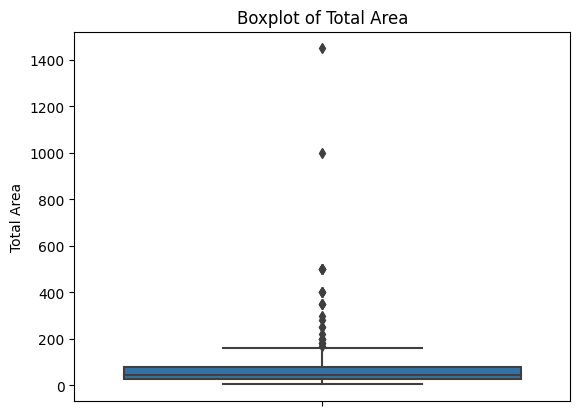

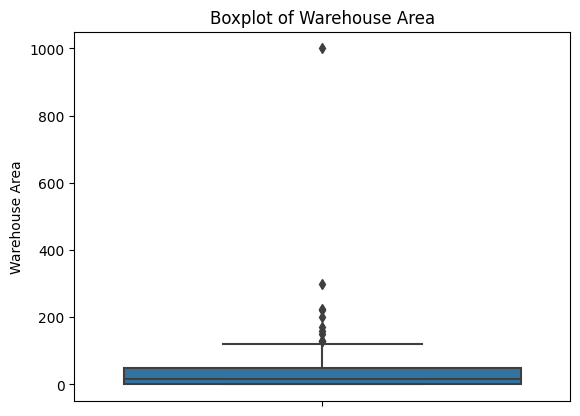

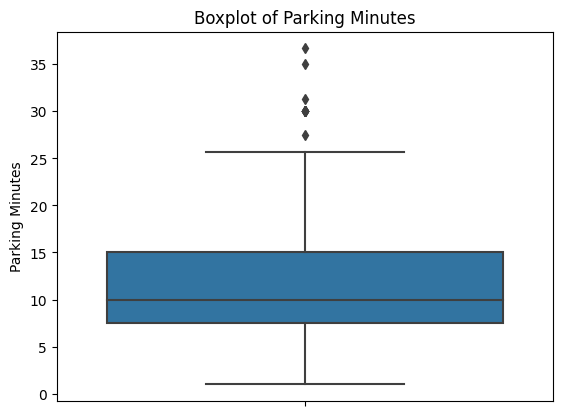

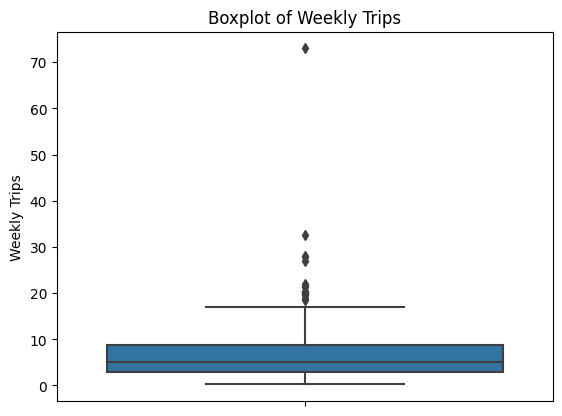

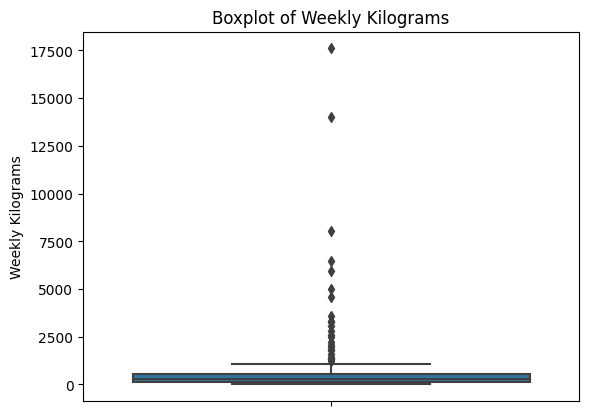

In [79]:
# Create a boxplot for each column
for column in numeric_fs_df.columns:
    sns.boxplot(y=numeric_fs_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

* Histograms for each numeric data

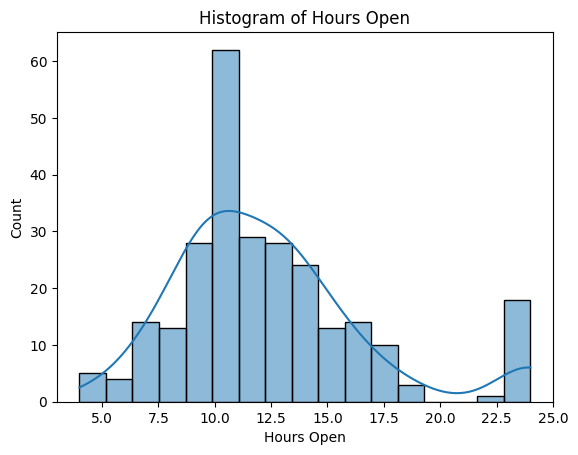

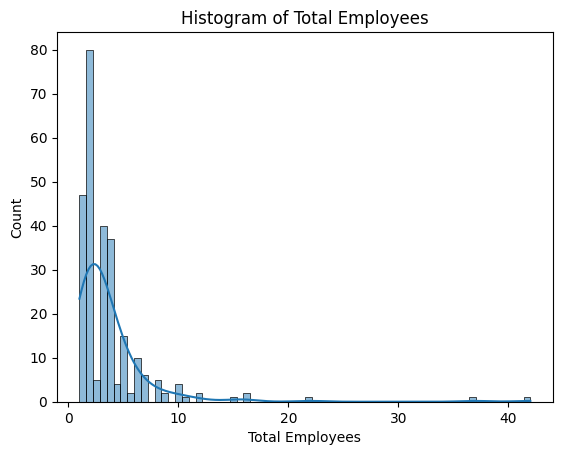

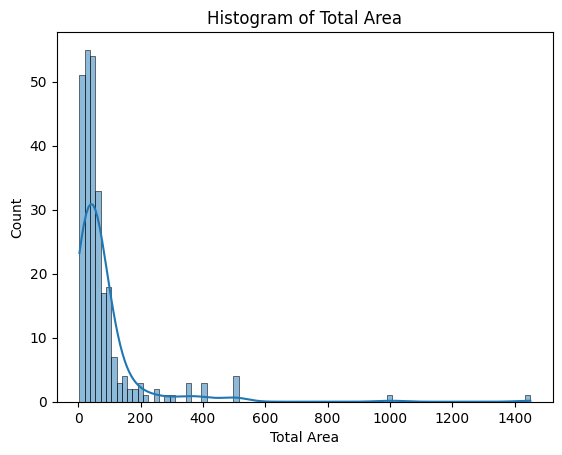

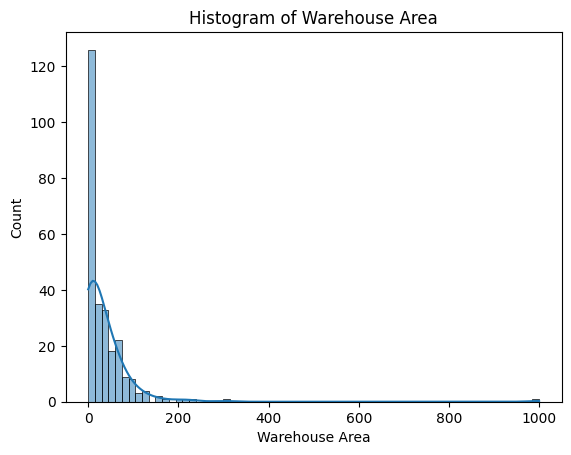

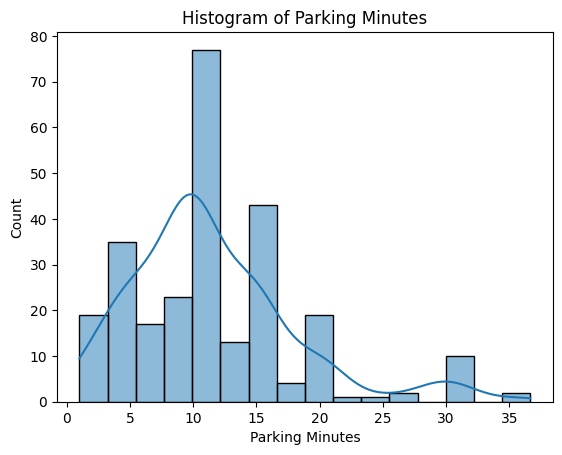

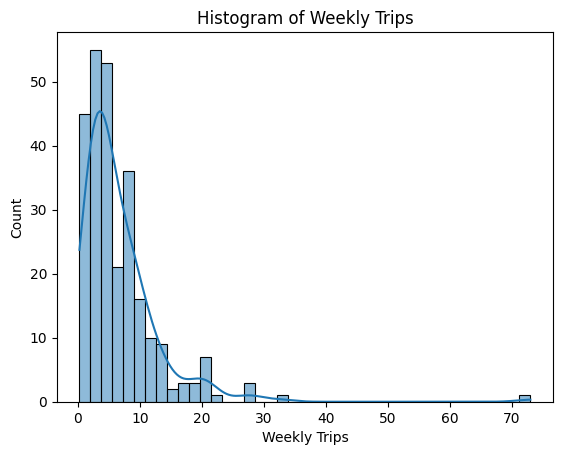

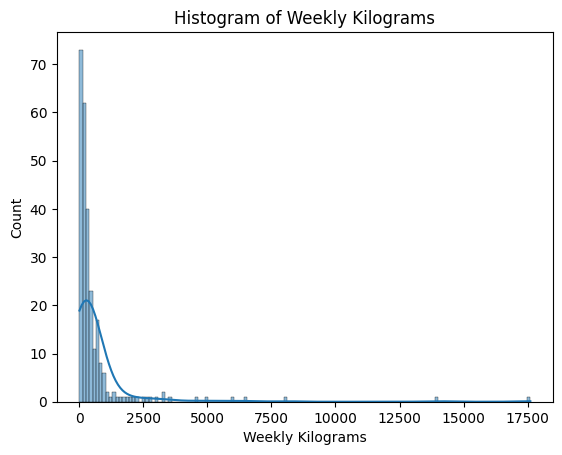

In [113]:
for column in numeric_fs_df.columns:
    sns.histplot(data=numeric_fs_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

It corresponds a gamma distribution, so this analysis will be made like this

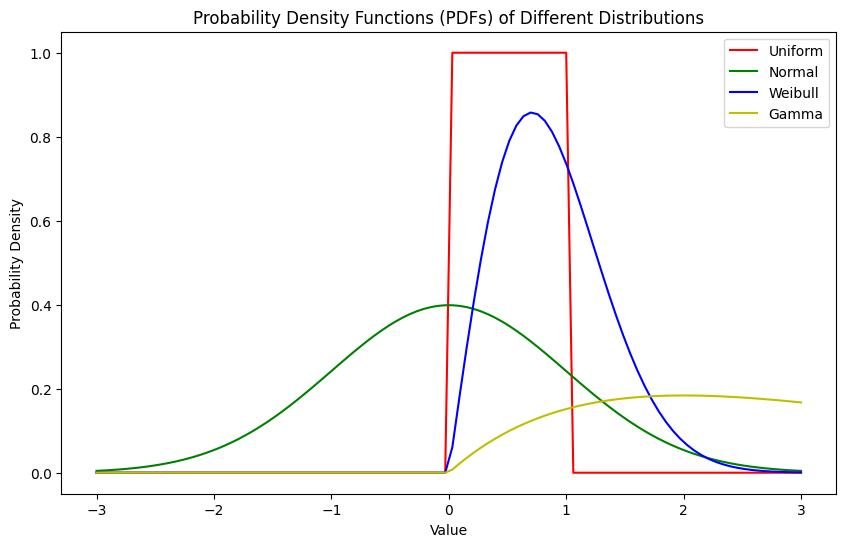

In [58]:
# Generate random data from different distributions
data_uniform = np.random.uniform(0, 1, 1000)
data_normal = np.random.normal(0, 1, 1000)
data_weibull = np.random.weibull(2, 1000)
data_gamma = np.random.gamma(2, 2, 1000)

# Define the range of x values for the plots
x = np.linspace(-3, 3, 100)

# Calculate the PDFs for each distribution
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)

# Create a single plot for all PDFs
plt.figure(figsize=(10, 6))

# Plot the PDFs of each distribution
plt.plot(x, pdf_uniform, 'r-', label='Uniform')
plt.plot(x, pdf_normal, 'g-', label='Normal')
plt.plot(x, pdf_weibull, 'b-', label='Weibull')
plt.plot(x, pdf_gamma, 'y-', label='Gamma')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions (PDFs) of Different Distributions')

# Add a legend to identify each distribution
plt.legend()

# Show the plot
plt.show()

* Gamma distribution analysis

Mean for column 'Hours Open': 12.387218045112782
Median for column 'Hours Open': 12.0
Variance for column 'Hours Open': 18.635776471253322
Skewness for column 'Hours Open': 1.0998921542800069
Kurtosis for column 'Hours Open': 1.26149289937426


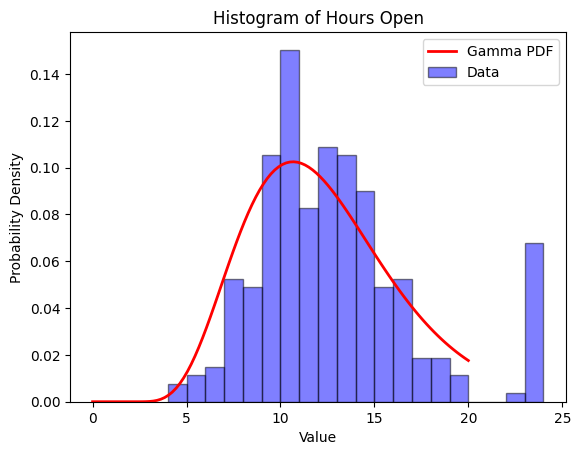

Mean for column 'Total Employees': 3.654135338345865
Median for column 'Total Employees': 3.0
Variance for column 'Total Employees': 17.192407711006833
Skewness for column 'Total Employees': 5.657709134990182
Kurtosis for column 'Total Employees': 42.79447450434157


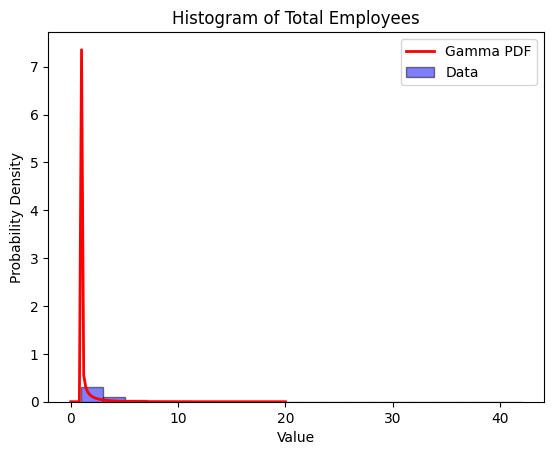

Mean for column 'Total Area': 79.28195488721805
Median for column 'Total Area': 45.0
Variance for column 'Total Area': 17608.67614053932
Skewness for column 'Total Area': 6.163685971663039
Kurtosis for column 'Total Area': 50.71806178462689


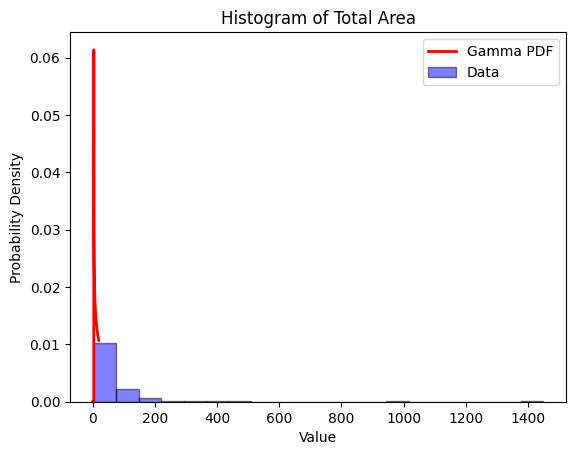

Mean for column 'Has Warehouse': 0.6626541353383457
Median for column 'Has Warehouse': 1.001
Variance for column 'Has Warehouse': 0.22386794052801176
Skewness for column 'Has Warehouse': -0.6833148556260074
Kurtosis for column 'Has Warehouse': -1.5330808080808092


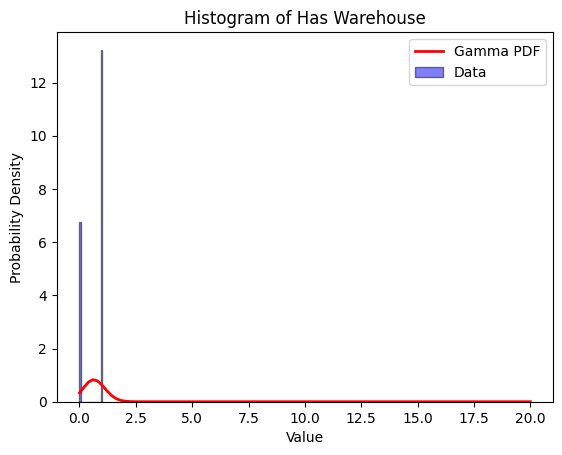

Mean for column 'Warehouse Area': 34.53671428571428
Median for column 'Warehouse Area': 16.001
Variance for column 'Warehouse Area': 5322.777859828141
Skewness for column 'Warehouse Area': 9.15595289110049
Kurtosis for column 'Warehouse Area': 113.57834373793594


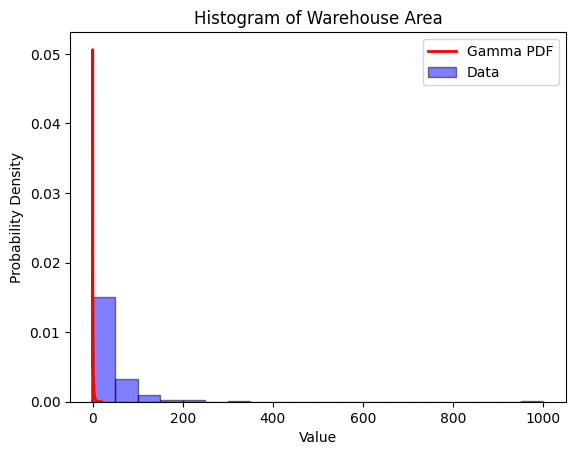

Mean for column 'Has Parking': 0.35062406015037584
Median for column 'Has Parking': 0.001
Variance for column 'Has Parking': 0.22738707671434216
Skewness for column 'Has Parking': 0.6307038196322438
Kurtosis for column 'Has Parking': -1.6022126919012987


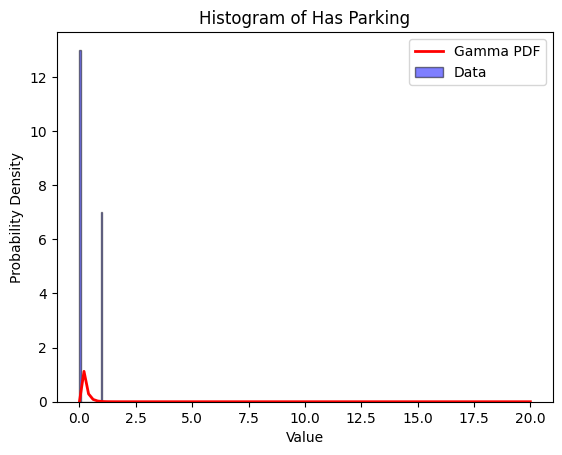

Mean for column 'Parking Minutes': 11.506690111469679
Median for column 'Parking Minutes': 10.0
Variance for column 'Parking Minutes': 42.66409401791621
Skewness for column 'Parking Minutes': 1.2214790800436948
Kurtosis for column 'Parking Minutes': 1.9468969624040309


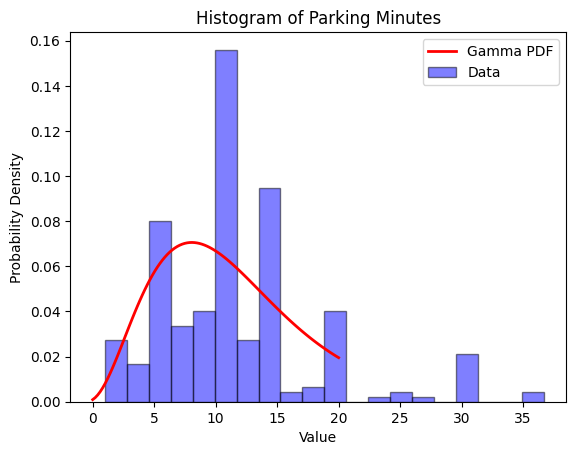

Mean for column 'Weekly Trips': 6.68796992481203
Median for column 'Weekly Trips': 5.0
Variance for column 'Weekly Trips': 45.322750014133085
Skewness for column 'Weekly Trips': 4.460255368432631
Kurtosis for column 'Weekly Trips': 35.154134567781846


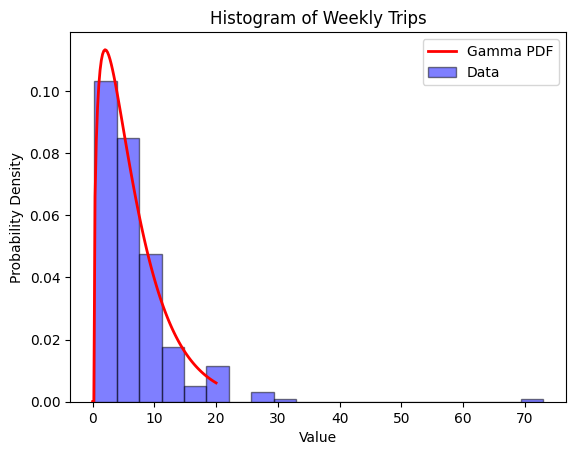

Mean for column 'Weekly Kilograms': 644.7763721804512
Median for column 'Weekly Kilograms': 255.89499999999998
Variance for column 'Weekly Kilograms': 2682646.642437873
Skewness for column 'Weekly Kilograms': 7.057632102145573
Kurtosis for column 'Weekly Kilograms': 59.916438579428956


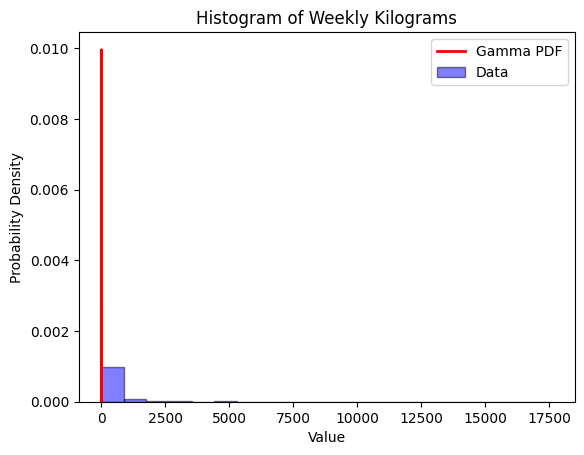

In [59]:
# Iterate through the columns
for column_name in numeric_fs_df.columns:
    # Extract the data from the column
    data = numeric_fs_df[column_name]

    # Check for and handle zero or negative values
    min_value = data.min()
    if min_value <= 0:
        data = data - min_value + 0.001  # Add a small constant to make data strictly positive


    # Step 1: Explore the data
    # Calculate summary statistics
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Create a histogram
    plt.hist(data, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Histogram of {column_name}')

    # Step 2: Hypothesis Testing
    # Perform goodness-of-fit test (Kolmogorov-Smirnov test)
    ks_statistic, ks_p_value = stats.kstest(data, 'gamma', args=(2, 0, 2))
    if ks_p_value > 0.05:
        print(f"H0 (gamma distribution) is not rejected for column '{column_name}' (p-value =", ks_p_value, ")")

    # Step 3: Parameter Estimation
    shape_estimate, loc_estimate, scale_estimate = stats.gamma.fit(data)

    # Step 4: Descriptive Statistics
    print(f"Mean for column '{column_name}':", mean)
    print(f"Median for column '{column_name}':", median)
    print(f"Variance for column '{column_name}':", variance)
    print(f"Skewness for column '{column_name}':", skewness)
    print(f"Kurtosis for column '{column_name}':", kurtosis)

    # Step 5: Confidence Intervals (Optional)
    # Calculate confidence intervals for parameter estimates
    ci_shape = stats.gamma.fit(data, floc=0)[0:2]
    ci_scale = stats.gamma.fit(data, f0=shape_estimate)[2:4]

    # Step 6: Visualization
    # Create a PDF plot of the gamma distribution overlaid with the histogram
    x = np.linspace(0, 20, 100)
    pdf_gamma = stats.gamma.pdf(x, shape_estimate, loc_estimate, scale_estimate)
    plt.plot(x, pdf_gamma, 'r-', lw=2)

    # Step 7: Inferential Statistics (e.g., calculate probabilities, percentiles)

    # Step 8: Model Assessment (visual comparison of PDF and histogram)

    # Step 9: Residual Analysis (Optional)

    # Step 10: Reporting (document findings)

    # Show the plot
    plt.legend(['Gamma PDF', 'Data'])
    plt.show()

* Graphs of distributions

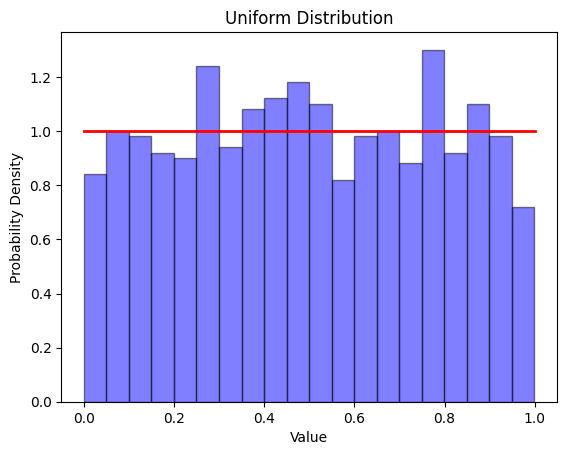

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data from a uniform distribution
data_uniform = np.random.uniform(0, 1, 1000)

# Create a histogram
plt.hist(data_uniform, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the uniform distribution
x = np.linspace(0, 1, 100)
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_uniform, 'r-', lw=2)

plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


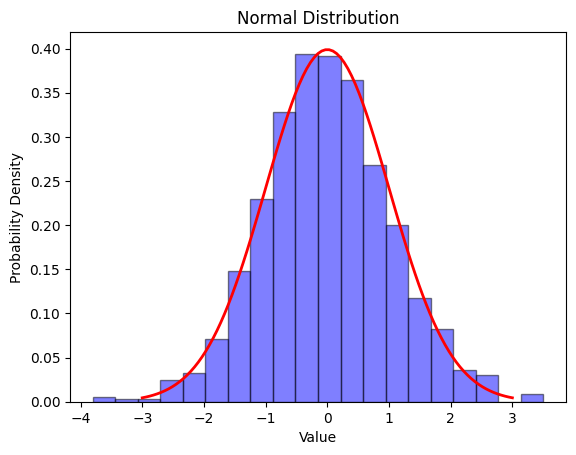

In [38]:
# Generate random data from a normal distribution
data_normal = np.random.normal(0, 1, 1000)

# Create a histogram
plt.hist(data_normal, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the normal distribution
x = np.linspace(-3, 3, 100)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_normal, 'r-', lw=2)

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

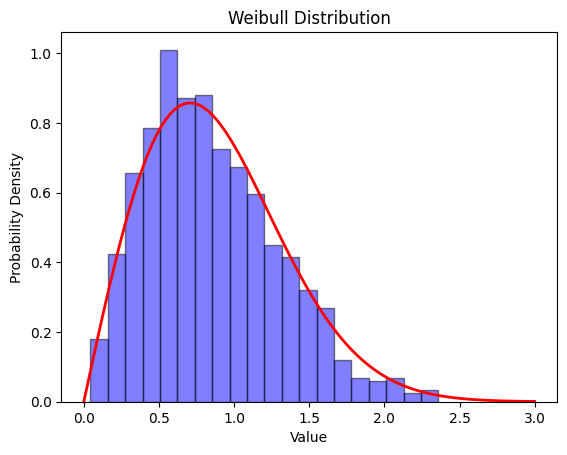

In [39]:
# Generate random data from a Weibull distribution
data_weibull = np.random.weibull(2, 1000)

# Create a histogram
plt.hist(data_weibull, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the Weibull distribution
x = np.linspace(0, 3, 100)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
plt.plot(x, pdf_weibull, 'r-', lw=2)

plt.title('Weibull Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

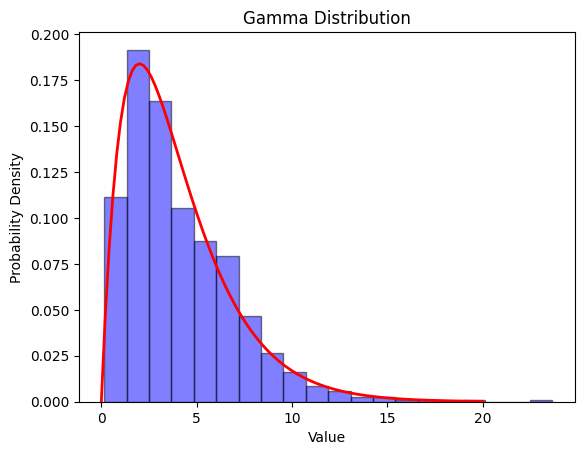

In [40]:
# Generate random data from a gamma distribution
data_gamma = np.random.gamma(2, 2, 1000)

# Create a histogram
plt.hist(data_gamma, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the gamma distribution
x = np.linspace(0, 20, 100)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)
plt.plot(x, pdf_gamma, 'r-', lw=2)

plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

## Modeling

In [60]:
df.columns

Index(['Year', 'List Number', 'AMVA Zone', 'Mu', 'ISIC Description',
       'Division Group', 'Macrogroup', 'MG Description', 'Establishment Name',
       'Hours Open', 'Total Employees', 'Establishment Size', 'Total Area',
       'Has Warehouse', 'Warehouse Area', 'Has Parking', 'Parking Minutes',
       'Weekly Trips', 'Weekly Kilograms'],
      dtype='object')

In [152]:
model_columns=['Weekly Trips','Hours Open', 'Total Employees', 'Establishment Size', 
               'Total Area',  'Has Warehouse', 'Warehouse Area',
                 'Has Parking', 'Parking Minutes'
               , 'Weekly Kilograms']
model_df=fs_df[model_columns]

# Convert all data to numeric, replacing non-convertible values with NaN
model_df = model_df.apply(pd.to_numeric, errors='coerce')

# Now, df contains only numeric data, and non-convertible values are NaN
model_df['Establishment Size'] = fs_df['Establishment Size'].astype(str)
model_df
model_df.describe().round(2)

,Weekly Trips,Hours Open,Total Employees,Establishment Size,Total Area,Has Warehouse,Warehouse Area,Has Parking,Parking Minutes,Weekly Kilograms
25,1.50,10,4.0,Micro,120,1,10.0,1,15.000000,900.00
773,11.00,16,6.0,Micro,100,1,10.0,1,10.348837,300.00
809,5.00,10,1.0,Micro,60,1,15.0,1,6.833333,9.50
836,0.75,9,6.0,Micro,80,0,0.0,1,14.000000,47.50
873,1.25,10,1.0,Micro,4,0,0.0,1,13.333333,350.00
...,...,...,...,...,...,...,...,...,...,...
4236,4.00,11,4.0,Micro,130,1,130.0,0,15.000000,240.00
4237,11.50,10,4.0,Micro,80,1,80.0,0,2.000000,359.50
4243,4.00,4,3.0,Micro,25,1,25.0,0,15.000000,295.00
4354,3.00,13,4.0,Mediana,70,1,0.0,1,27.500000,69.75


In [75]:
# Function to check if a variable is continuous
def is_continuous(series):
    # Check if the data type is numeric (int or float)
    if pd.api.types.is_numeric_dtype(series):
        # Check if the number of unique values is large
        return len(series.unique()) > 10  # Adjust the threshold as needed
    return False

# Function to check if a variable is categorical
def is_categorical(series, valid_types=("object", "category")):
    # Check if the data type is in the list of valid types
    return series.dtype.name in valid_types

# Function to check if a variable is discrete (modified to consider any categorical variable as discrete)
def is_discrete(series):
    # Check if a variable is categorical
    return is_categorical(series)

# Function to check if a variable is binary
def is_binary(series):
    # Check if a variable has exactly 2 unique values
    return len(series.unique()) == 2

# Check each column's data type
for column_name in model_df.columns:
    column = model_df[column_name]
    if is_continuous(column):
        print(f"'{column_name}' is a continuous variable.")
    elif is_discrete(column):
        if is_categorical(column):
            print(f"'{column_name}' is a categorical variable.")
        else:
            print(f"'{column_name}' is a discrete variable.")
    elif is_binary(column):
        print(f"'{column_name}' is a binary variable.")
    else:
        print(f"'{column_name}' is not categorized as continuous, discrete, or binary.")


'Hours Open' is a continuous variable.
'Total Employees' is a continuous variable.
'Establishment Size' is a categorical variable.
'Total Area' is a continuous variable.
'Has Warehouse' is a binary variable.
'Warehouse Area' is a continuous variable.
'Has Parking' is a binary variable.
'Parking Minutes' is a continuous variable.
'Weekly Trips' is a continuous variable.
'Weekly Kilograms' is a continuous variable.


* Histogram for non numeric columns

* Categorical

In [116]:
categorical_colums=['Establishment Size']
categorical_df=fs_df[categorical_colums]
categorical_df

,Establishment Size
25,Micro
773,Micro
809,Micro
836,Micro
873,Micro
...,...
4236,Micro
4237,Micro
4243,Micro
4354,Mediana


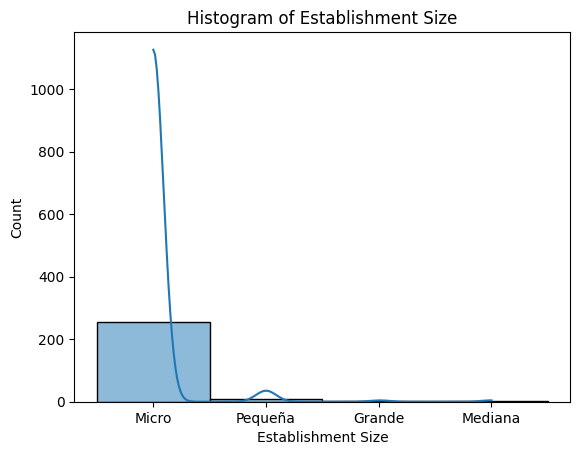

In [118]:
for column in categorical_df.columns:
    sns.histplot(data=categorical_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

* Binary columns

In [117]:
binary_colums=['Has Warehouse', 'Has Parking']
binary_df=fs_df[binary_colums]
binary_df

,Has Warehouse,Has Parking
25,1,1
773,1,1
809,1,1
836,0,1
873,0,1
...,...,...
4236,1,0
4237,1,0
4243,1,0
4354,1,1


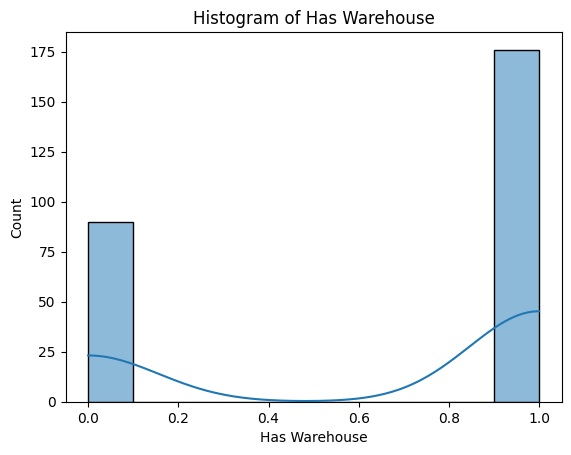

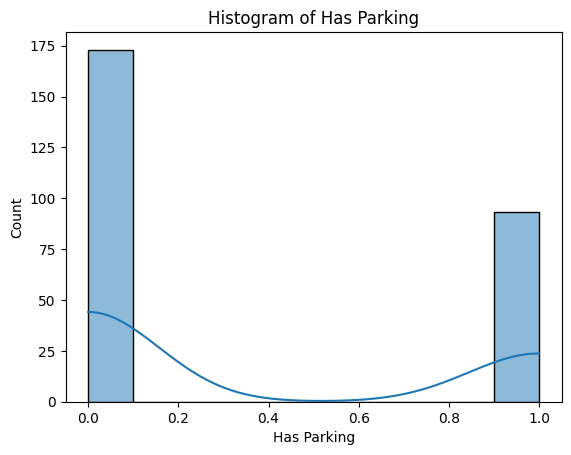

In [119]:
for column in binary_df.columns:
    sns.histplot(data=binary_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

Performing a regression analysis on a dataset like `model_df` involves several steps, and the approach you take depends on the types of variables (continuous, discrete, categorical) and the specific goals of your analysis. Here are the general steps for conducting a regression analysis, considering the classification of variables:

**Step 1: Data Preparation**
- Clean the data by handling missing values and outliers.
- Encode categorical variables if necessary (e.g., one-hot encoding or label encoding).
- Standardize or normalize continuous variables if required.

**Step 2: Define the Dependent and Independent Variables**
- Identify the dependent variable (the one you want to predict) and the independent variables (predictors or features).

**Step 3: Select the Appropriate Regression Model**
- Choose the most suitable regression model based on the nature of the dependent and independent variables.
  - Linear Regression: for predicting a continuous dependent variable.
  - Logistic Regression: for predicting binary outcomes (if you have binary dependent variables).
  - Multinomial or Ordinal Regression: for predicting categorical outcomes with more than two categories.
  - Poisson Regression: for count data.
  - Other specialized regression models as needed.

**Step 4: Split the Data**
- Split the dataset into a training set and a testing set to evaluate the model's performance.

**Step 5: Model Training**
- Train the chosen regression model using the training data.
- Use appropriate techniques for handling categorical variables (e.g., dummy variables for linear regression or specialized encodings for other models).
- Choose an appropriate method for handling multicollinearity among predictor variables.

**Step 6: Model Evaluation**
- Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared for linear regression, or others depending on the regression type).
- Assess the assumptions of the regression model, such as linearity, homoscedasticity, and normality of residuals.
- Consider techniques like cross-validation to assess model robustness.

**Step 7: Interpretation**
- Interpret the coefficients or parameters of the regression model.
- Analyze the significance of predictors and their impact on the dependent variable.
- Identify any interactions or nonlinear relationships if applicable.

**Step 8: Predictions**
- Use the trained model to make predictions on new or test data.
- Assess the model's predictive accuracy and generalization to unseen data.

**Step 9: Communicate Results**
- Present your findings, including regression coefficients, statistical significance, and model performance, in a clear and understandable manner.

**Step 10: Further Analysis**
- Depending on the analysis goals, you may need to perform additional tests or analyses, such as hypothesis testing, sensitivity analysis, or model validation.

It's essential to adapt these steps based on the nature of your dataset and the specific regression analysis you are performing. Be mindful of the assumptions and requirements of the chosen regression model and make any necessary adjustments to meet those requirements. Additionally, consider consulting with a statistician or data scientist for more complex analyses or when dealing with specialized regression models.

In [95]:
# Set your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Loop through each column in numeric_fs_df
for column_name in numeric_fs_df.columns:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(numeric_fs_df[column_name])
    
    # Identify outliers based on the threshold
    is_outlier = np.logical_xor(np.abs(z_scores) > threshold, False)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name] = is_outlier

# Now, outlier_df contains True/False values indicating outliers for each column

# Calculate the number of outliers per column (column-wise sum)
outliers_per_column = outlier_df.sum(axis=0)

# Display the number of outliers per column and per row
print("Number of outliers per column:")
print(outliers_per_column)



Number of outliers per column:
Hours Open          0
Total Employees     3
Total Area          6
Warehouse Area      2
Parking Minutes     3
Weekly Trips        5
Weekly Kilograms    5
dtype: int64


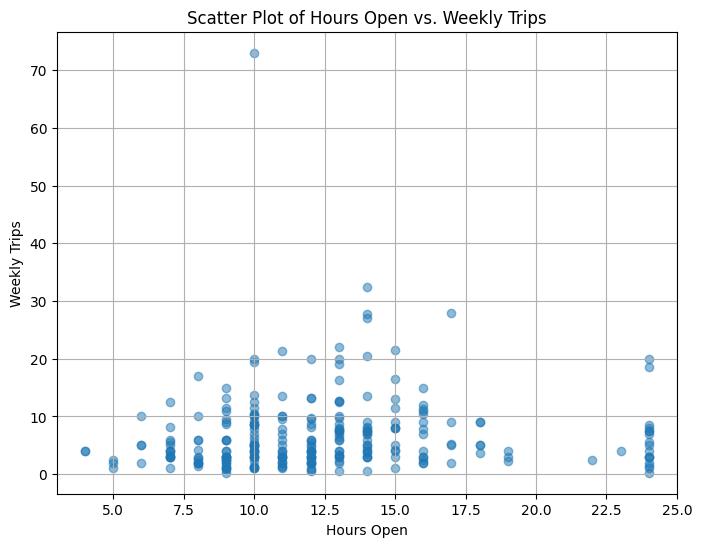

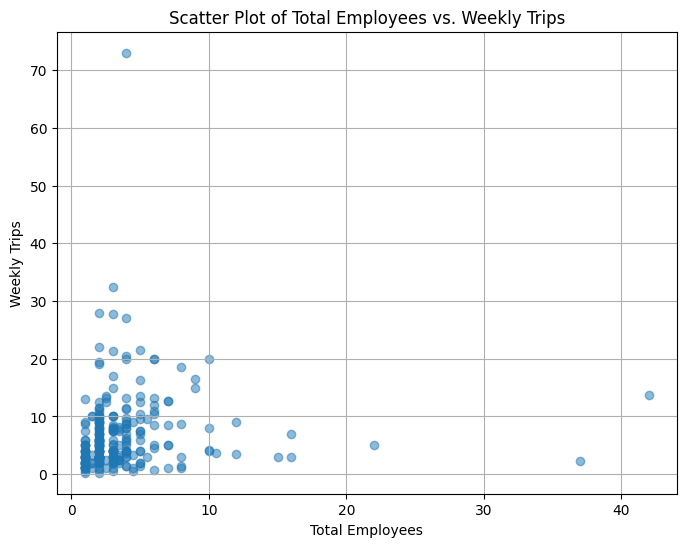

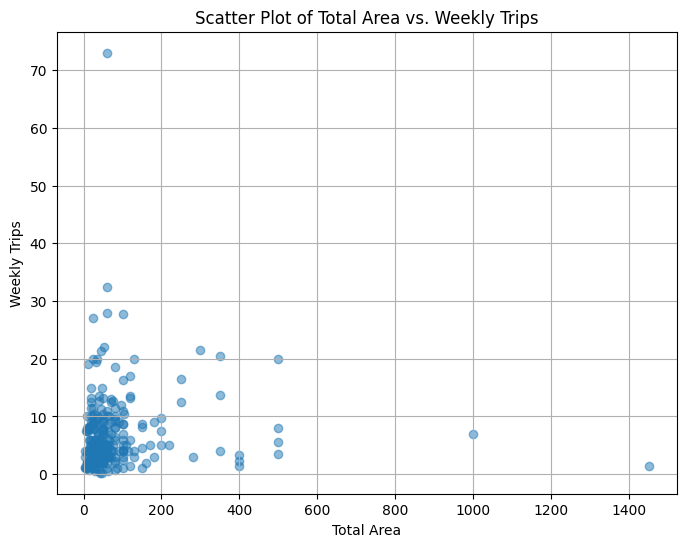

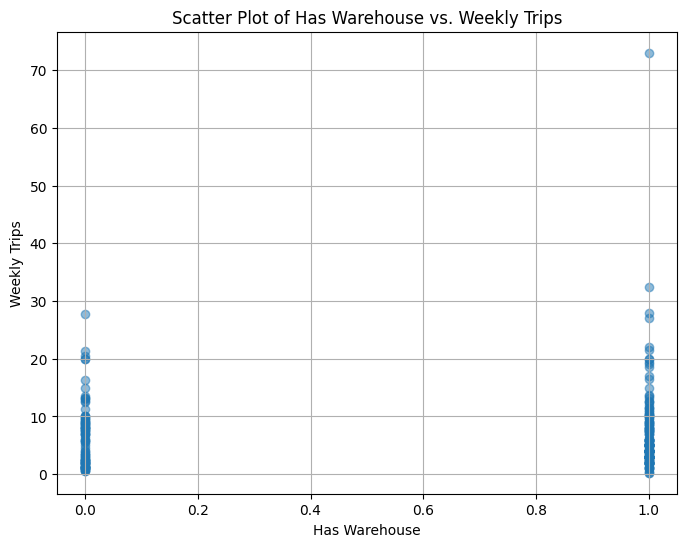

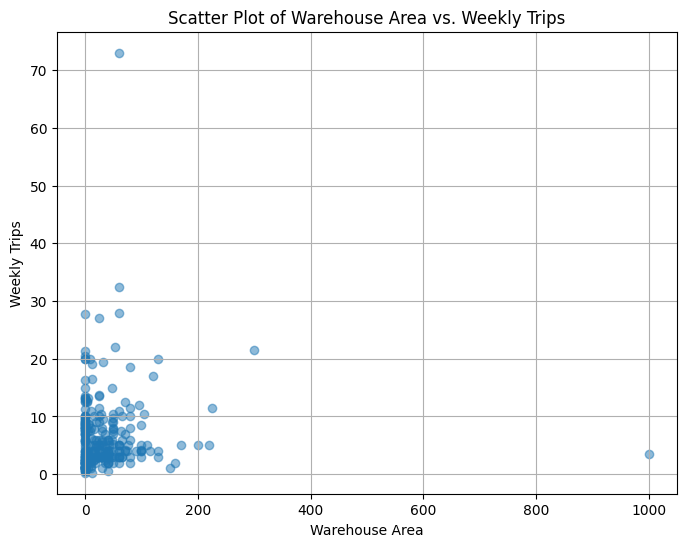

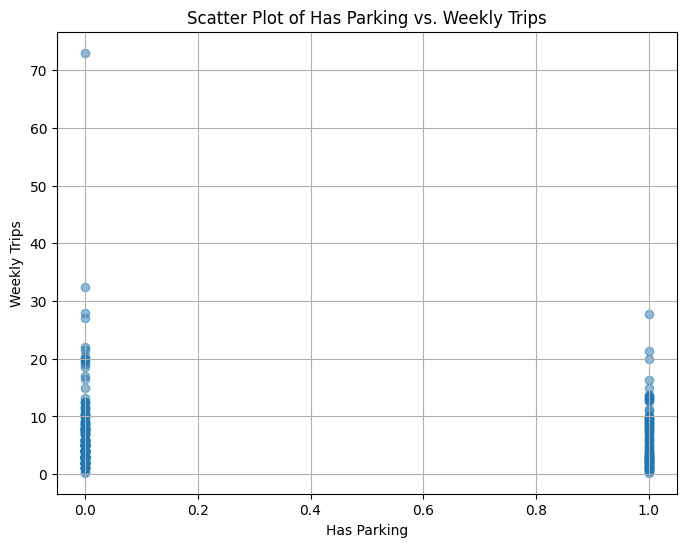

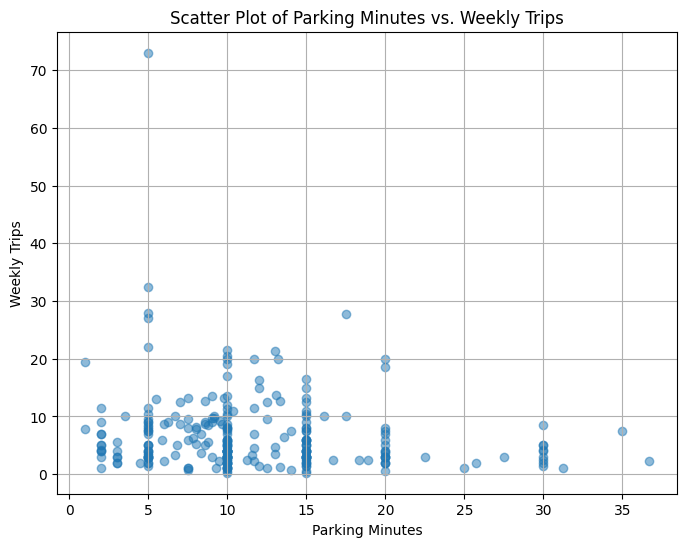

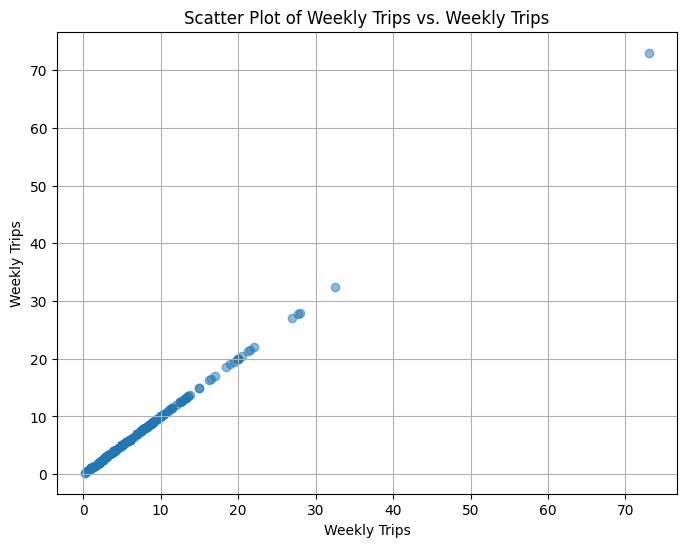

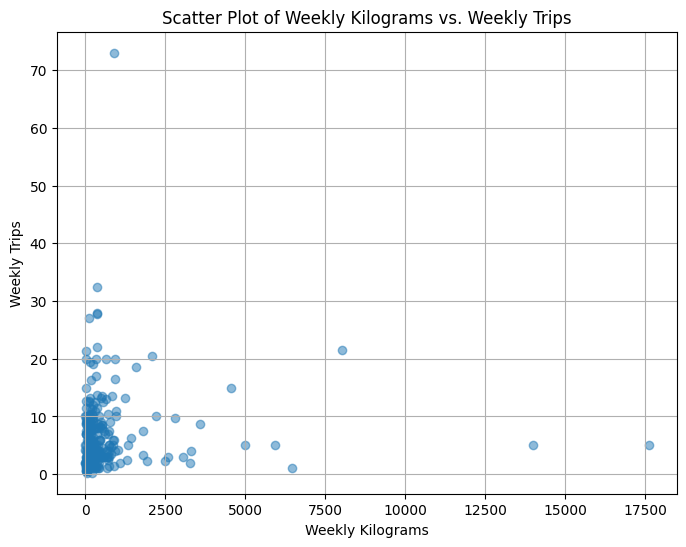

In [136]:
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for column_name in model_df.columns:
    # Check if the column is numeric (int, float, or other numeric types)
    if pd.api.types.is_numeric_dtype(model_df[column_name]):
        # Create a scatter plot for the current column
        plt.figure(figsize=(8, 6))  # Set the figure size
        plt.scatter(model_df[column_name], model_df['Weekly Trips'], alpha=0.5)
        plt.title(f'Scatter Plot of {column_name} vs. Weekly Trips')
        plt.xlabel(column_name)
        plt.ylabel('Weekly Trips')
        plt.grid(True)
        plt.show()


C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\2030216711.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_df.corr()


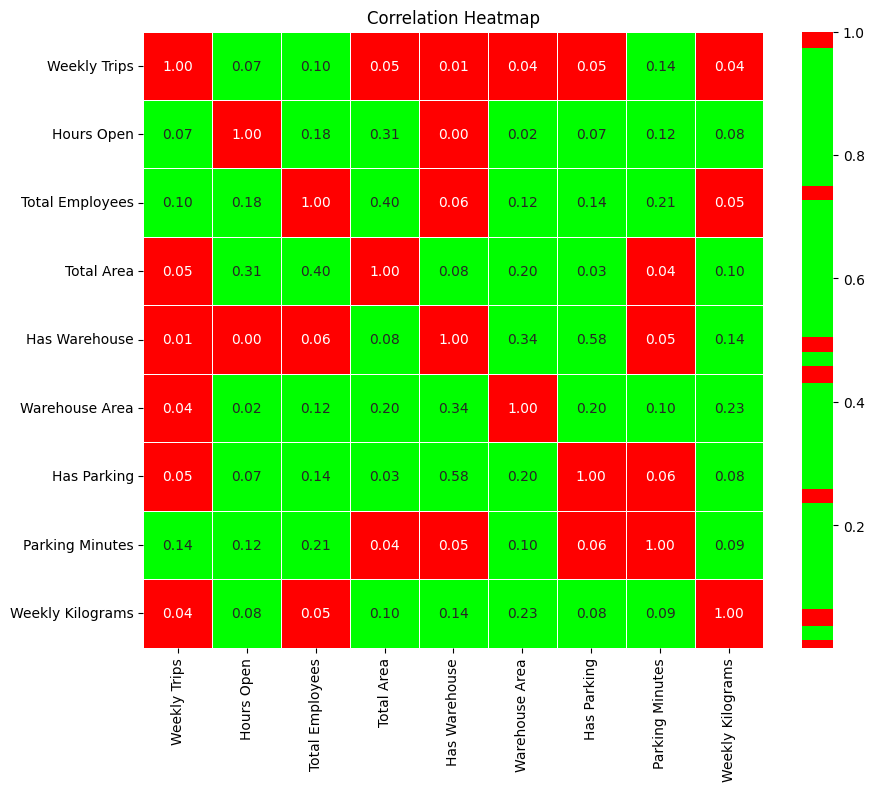

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Calculate the correlation matrix
correlation_matrix = model_df.corr()

# Create a custom colormap with green for values less than 0.5 in absolute value
cmap = ListedColormap(['#00FF00' if abs(val) < 0.5 else '#FF0000' for val in correlation_matrix.values.flatten()])

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with custom colors and annotation
sns.heatmap(correlation_matrix.abs(), annot=True, cmap=cmap, fmt=".2f", linewidths=.5, center=0)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()




C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\939418463.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_df.corr()


Correlation Matrix:
                  Weekly Trips  Hours Open  Total Employees  Total Area  \
Weekly Trips          1.000000    0.073233         0.097293    0.045887   
Hours Open            0.073233    1.000000         0.182120    0.311694   
Total Employees       0.097293    0.182120         1.000000    0.401528   
Total Area            0.045887    0.311694         0.401528    1.000000   
Has Warehouse         0.012590   -0.002117         0.063950   -0.075722   
Warehouse Area        0.037846   -0.016522         0.119189    0.197410   
Has Parking          -0.049455   -0.069418         0.140065   -0.030729   
Parking Minutes      -0.142608    0.120719         0.211605    0.038729   
Weekly Kilograms      0.037565    0.084980         0.052348    0.103531   

                  Has Warehouse  Warehouse Area  Has Parking  Parking Minutes  \
Weekly Trips           0.012590        0.037846    -0.049455        -0.142608   
Hours Open            -0.002117       -0.016522    -0.069418       

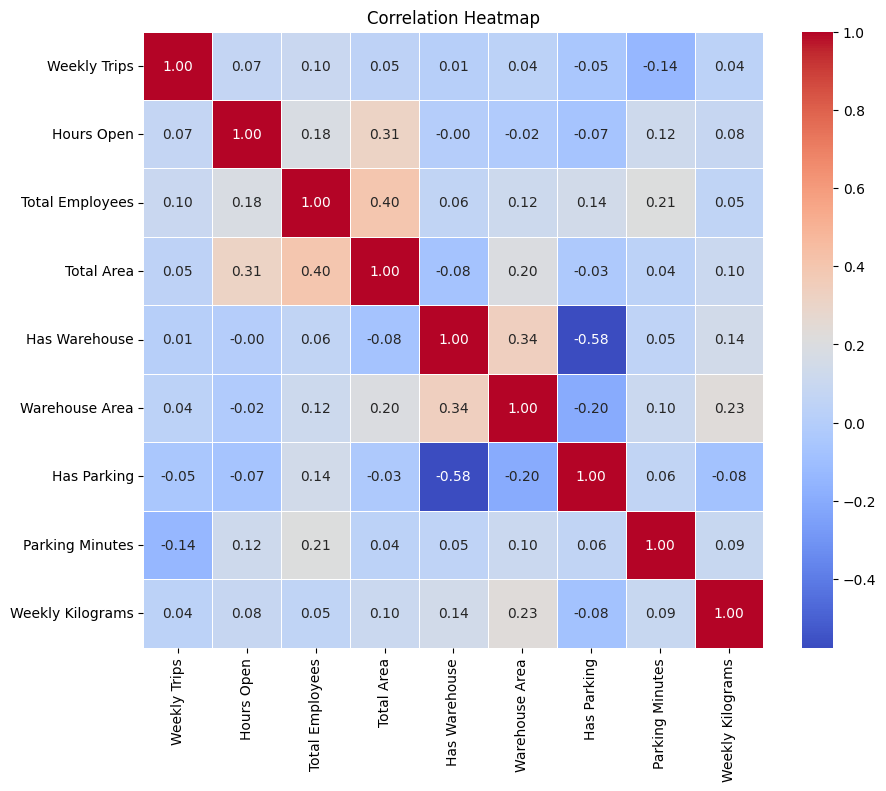

In [139]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = model_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [127]:
print(len(model_df.columns))
model_df.columns

10


Index(['Hours Open', 'Total Employees', 'Establishment Size', 'Total Area',
       'Has Warehouse', 'Warehouse Area', 'Has Parking', 'Parking Minutes',
       'Weekly Trips', 'Weekly Kilograms'],
      dtype='object')

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of independent variables
independent_variables = ['Hours Open', 'Total Employees', 'Total Area', 'Warehouse Area', 'Parking Minutes', 'Weekly Kilograms']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(model_df[independent_variables],
                                                    model_df['Weekly Trips'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize an empty dictionary to store results for each variable
results = {}

# Loop through each independent variable
for var in independent_variables:
    # Initialize the linear regression model
    model = LinearRegression()

    # Train the model on the training data for the current variable
    model.fit(X_train[[var]], y_train)

    # Make predictions on the testing data for the current variable
    y_pred = model.predict(X_test[[var]])

    # Evaluate the model's performance for the current variable
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results[var] = {'Mean Squared Error': mse, 'R-squared (R2) Score': r2}

# Print the results for each variable
for var, metrics in results.items():
    print(f"Results for '{var}':")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared (R2) Score: {metrics['R-squared (R2) Score']}")
    print()


Results for 'Hours Open':
Mean Squared Error: 130.98629772166674
R-squared (R2) Score: -0.04375099276242822

Results for 'Total Employees':
Mean Squared Error: 129.31683992917027
R-squared (R2) Score: -0.030448088118189665

Results for 'Total Area':
Mean Squared Error: 130.51941879863983
R-squared (R2) Score: -0.04003071554347315

Results for 'Warehouse Area':
Mean Squared Error: 130.03668723842796
R-squared (R2) Score: -0.0361841181972411

Results for 'Parking Minutes':
Mean Squared Error: 127.765224416706
R-squared (R2) Score: -0.018084197698434057

Results for 'Weekly Kilograms':
Mean Squared Error: 130.25274995953524
R-squared (R2) Score: -0.03790579201791733



## Robust regression

In [146]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [164]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Variables to store the best model and its MSE value
best_model = None
best_mse = float('inf')  # Initialize with a high value

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a robust regression model using Huber loss
            model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
            results = model.fit()

            # Make predictions using the current model
            y_pred = results.predict(X)

            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(y, y_pred)

            # Check if the current model has a lower MSE value
            if mse < best_mse:
                best_mse = mse
                best_model = results

                # Print summary for the best model so far
                print(f"Best model (MSE: {best_mse}):")
                print(best_model.summary())
                print("=" * 40)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# The best_model now contains the best model based on the lowest MSE value


Best model (MSE: 48.91721723393648):
                    Robust linear Model Regression Results                    
Dep. Variable:           Weekly Trips   No. Observations:                  266
Model:                            RLM   Df Residuals:                      265
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 28 Sep 2023                                         
Time:                        20:06:13                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours Open     

Best model (MSE: 48.212445752910384):
                    Robust linear Model Regression Results                    
Dep. Variable:           Weekly Trips   No. Observations:                  266
Model:                            RLM   Df Residuals:                      263
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 28 Sep 2023                                         
Time:                        20:06:13                                         
No. Iterations:                    18                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Hour

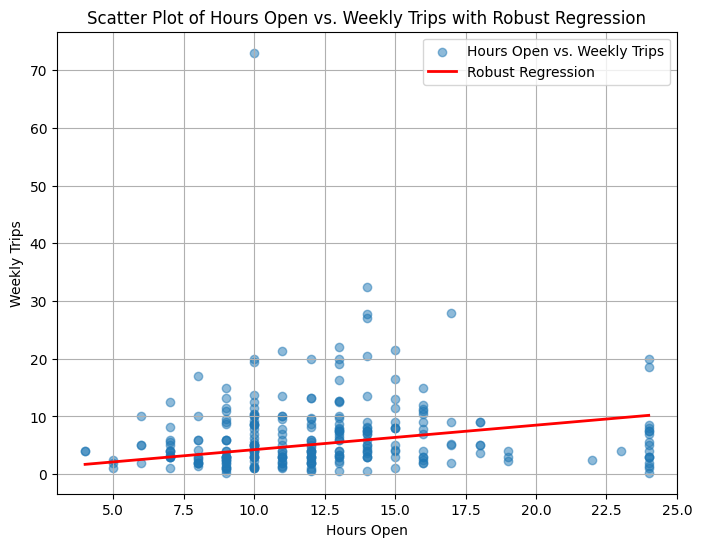

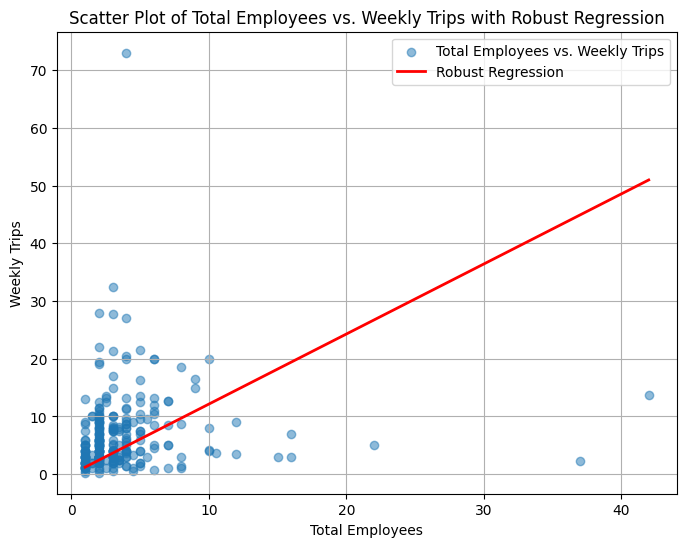

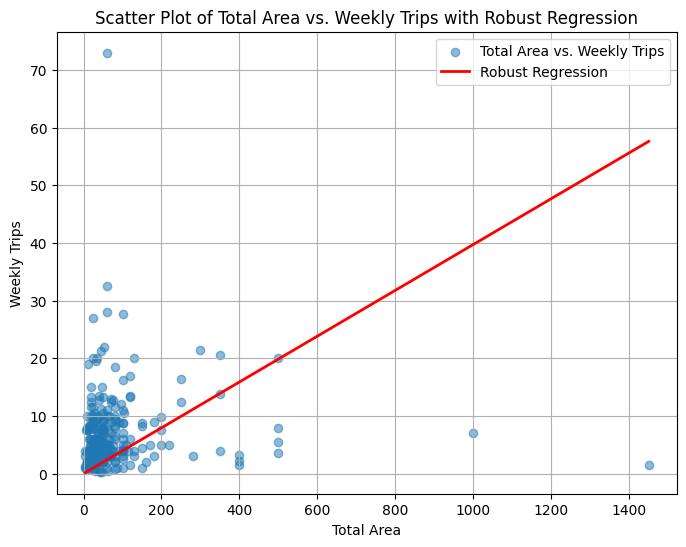

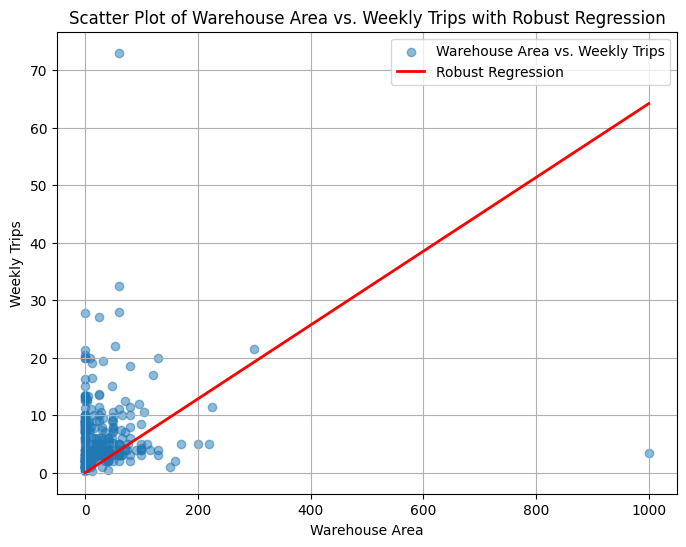

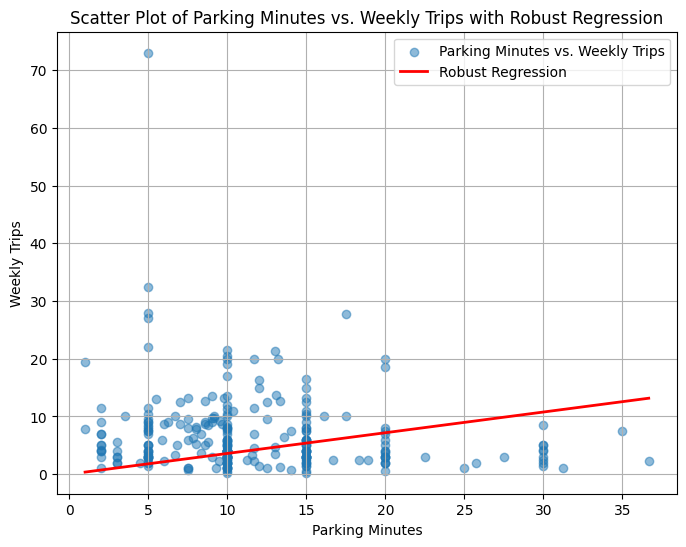

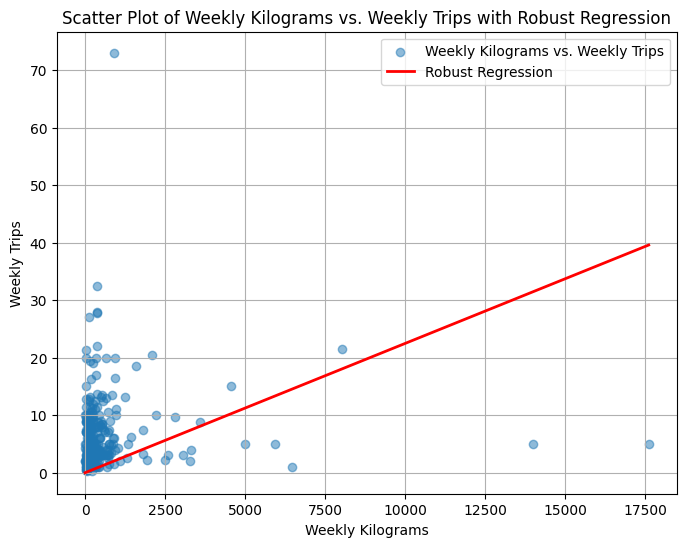

An error occurred for combination ('Hours Open', 'Total Employees'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open', 'Total Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open', 'Warehouse Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open', 'Parking Minutes'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open', 'Weekly Kilograms'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Total Employees', 'Warehouse Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Total Employees', 'Parking Minutes'): shapes (1,

C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\3827065278.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


An error occurred for combination ('Hours Open', 'Warehouse Area', 'Parking Minutes'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Hours Open', 'Warehouse Area', 'Weekly Kilograms'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Hours Open', 'Parking Minutes', 'Weekly Kilograms'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area', 'Warehouse Area'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area', 'Parking Minutes'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area', 'Weekly Kilograms'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Warehouse Area', 'Parking Minutes'): shapes (

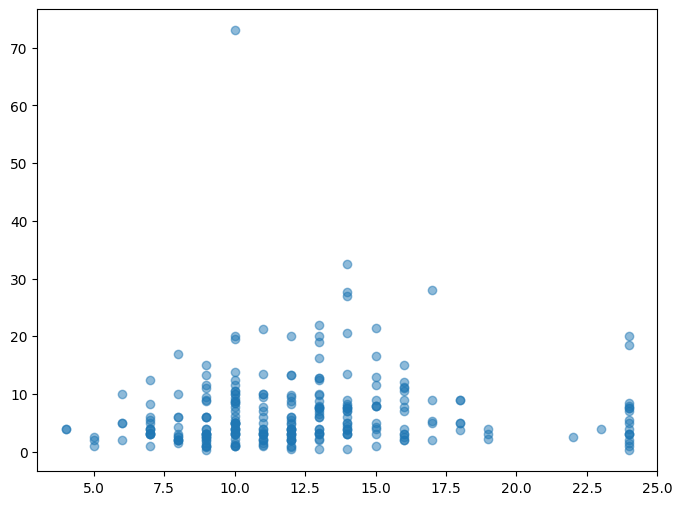

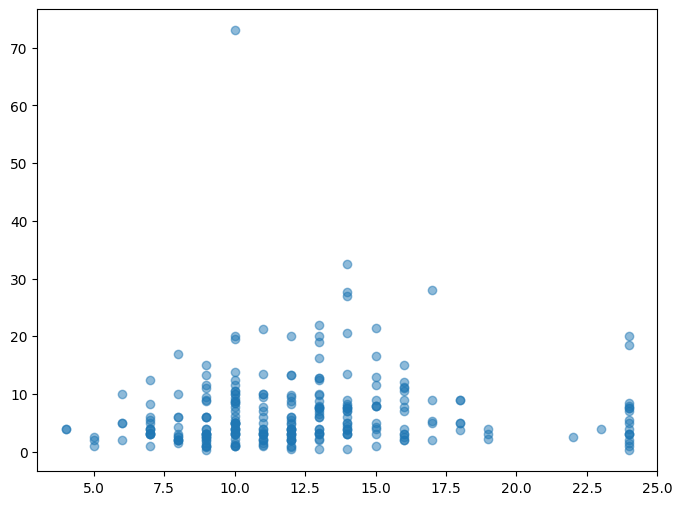

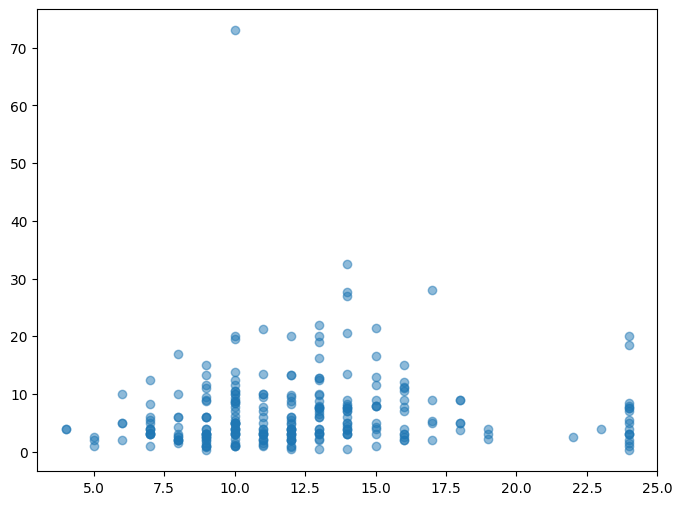

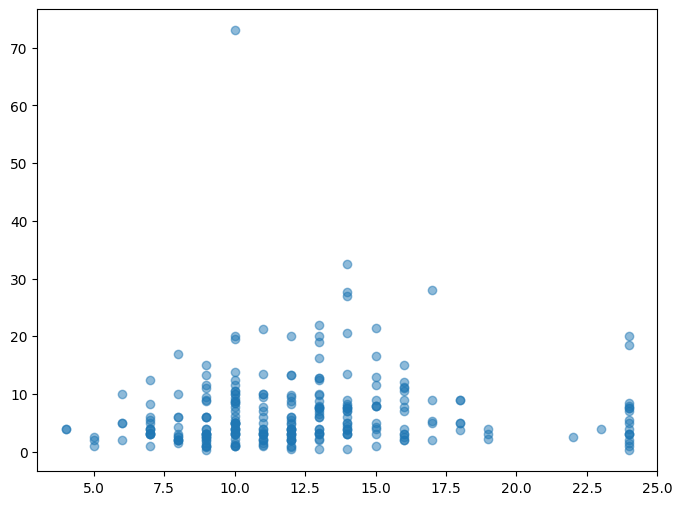

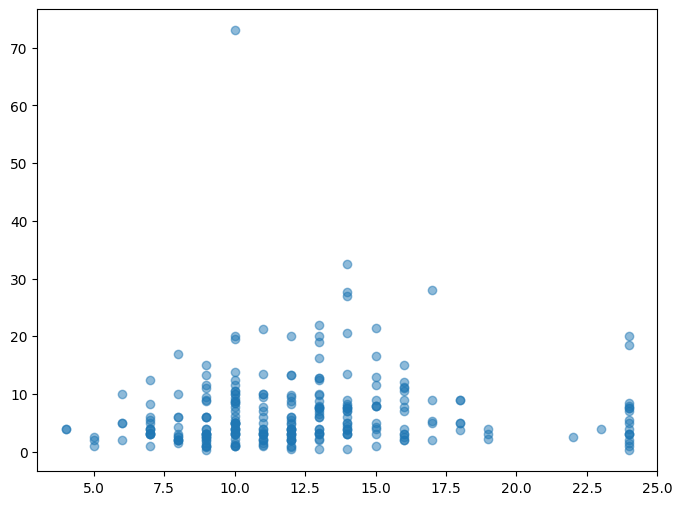

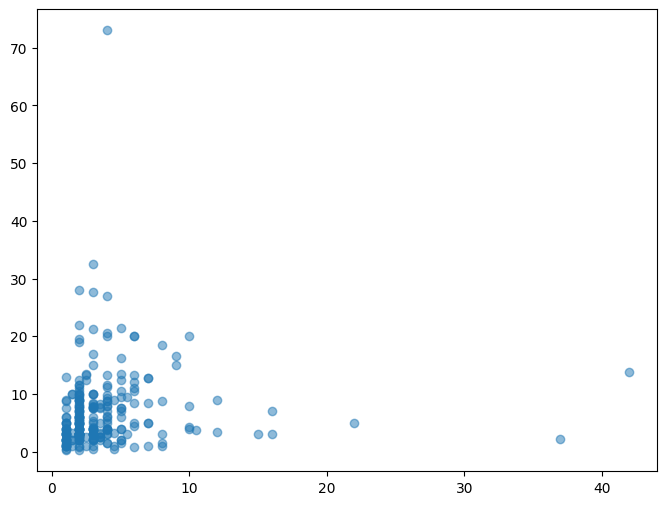

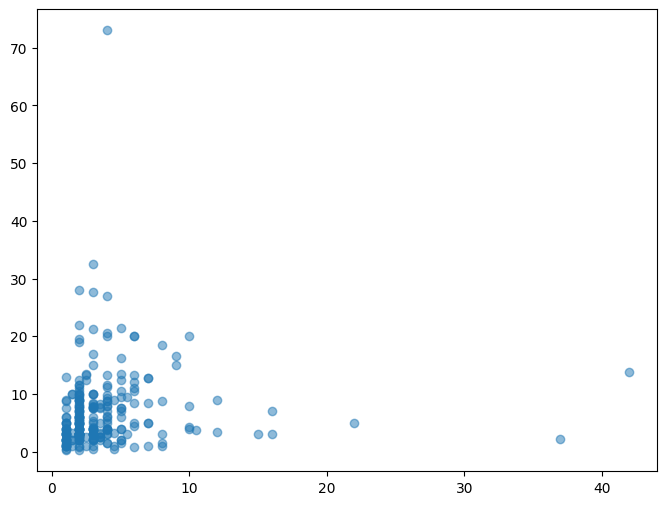

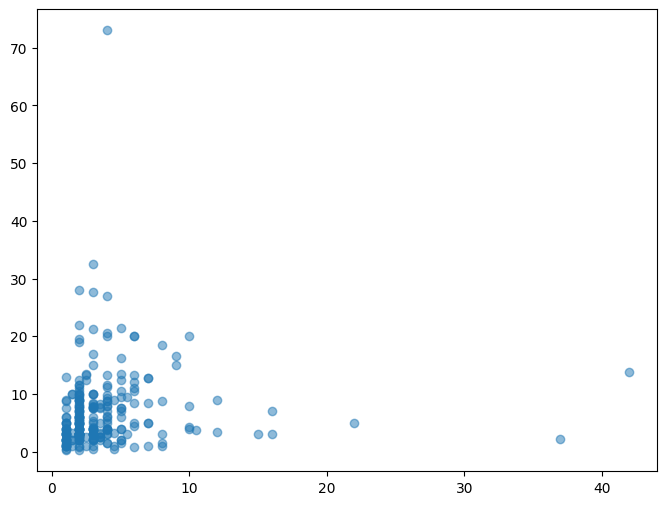

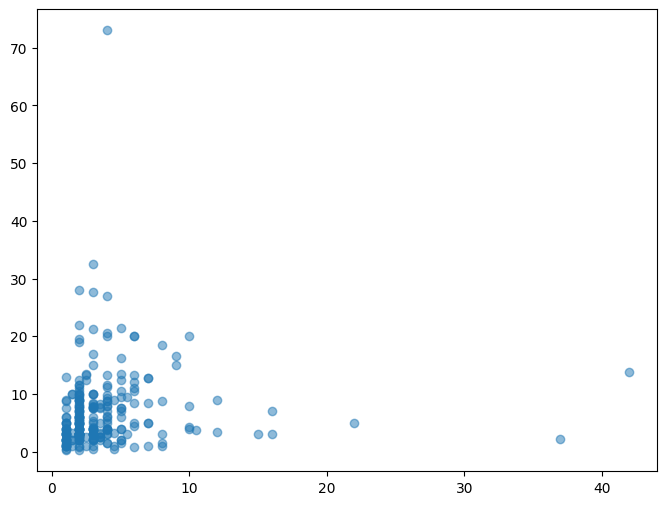

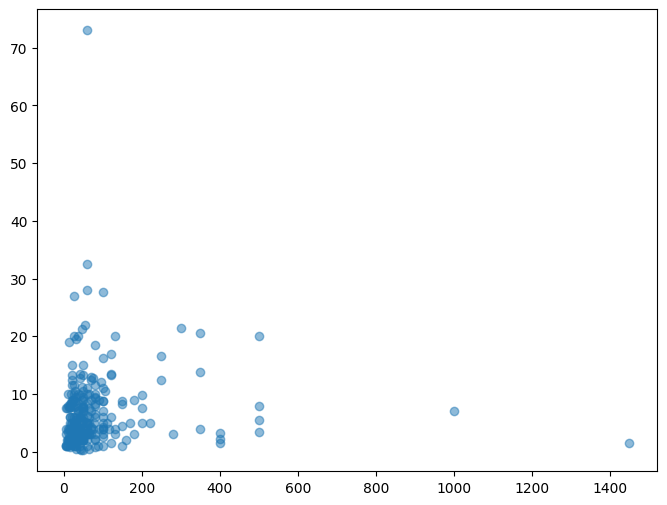

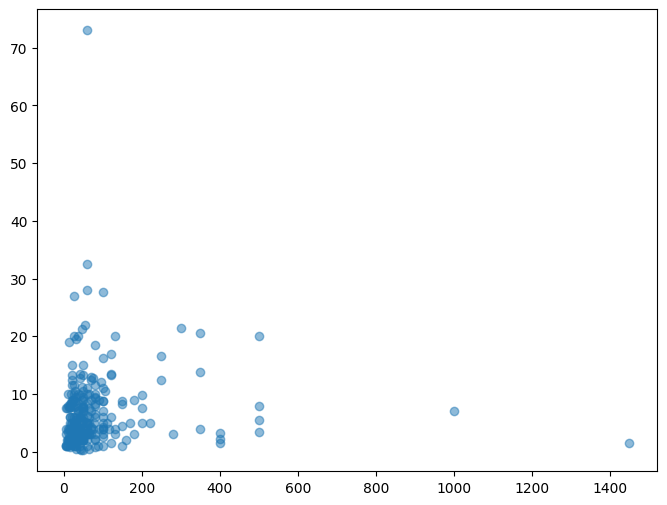

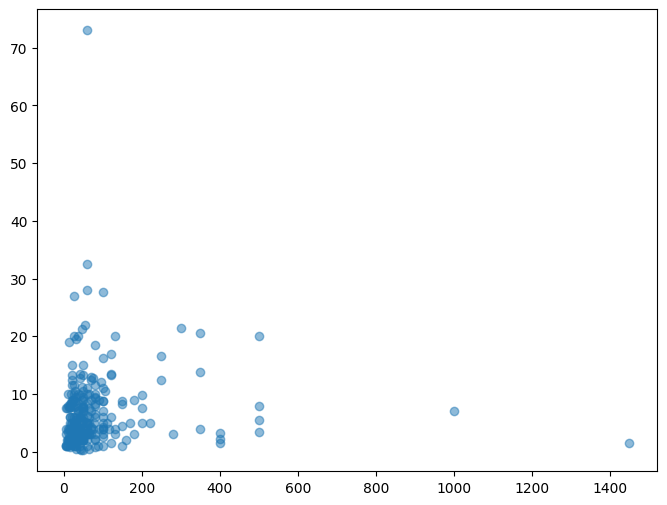

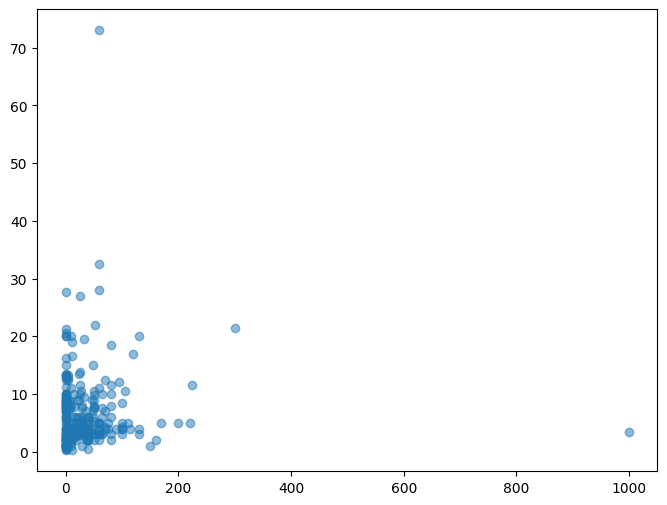

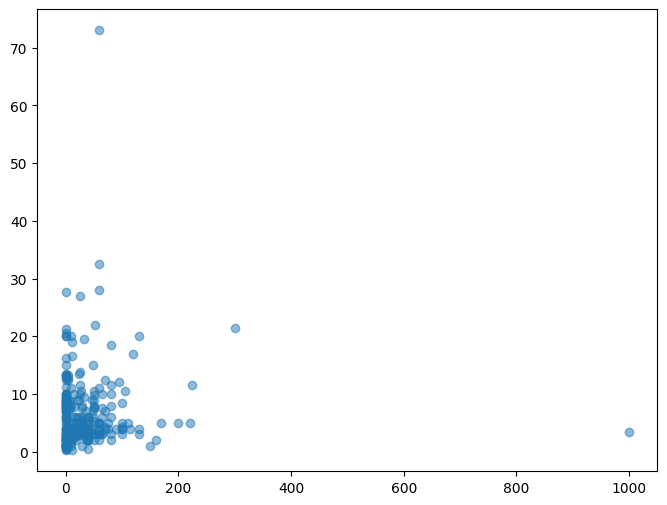

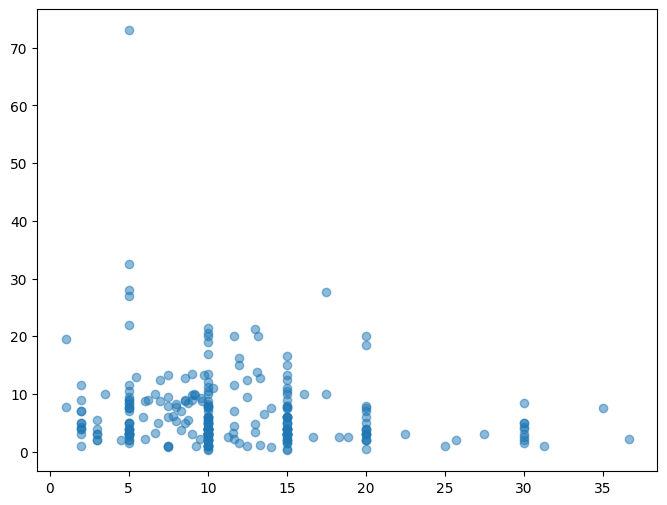

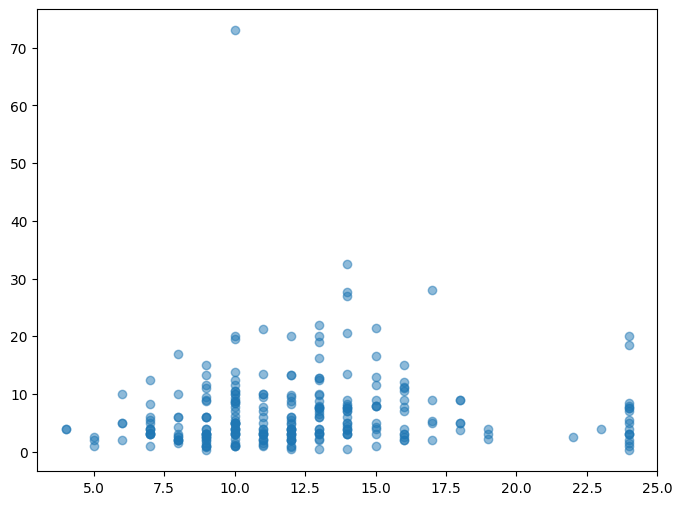

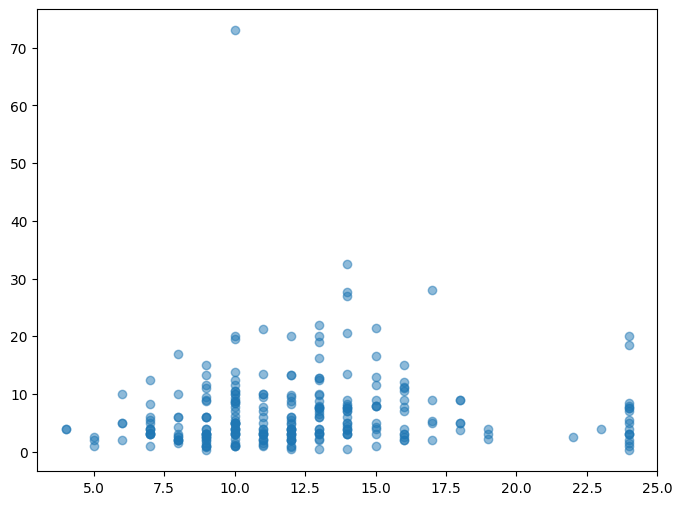

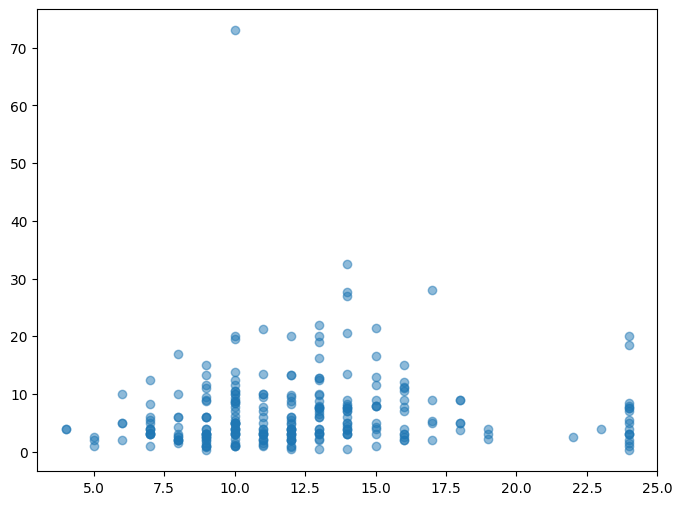

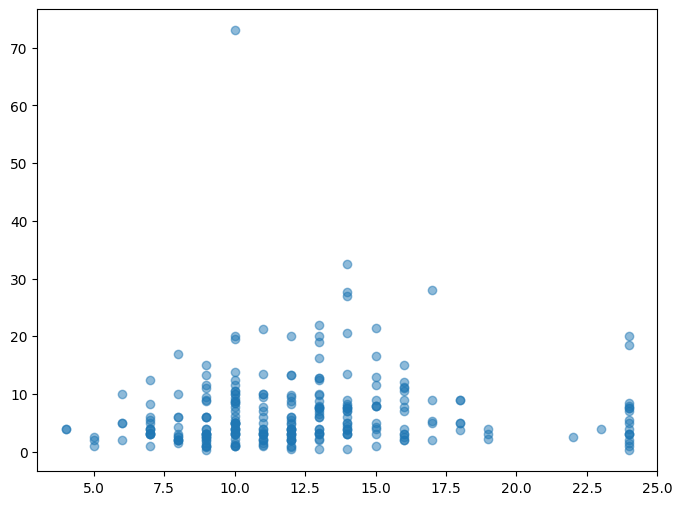

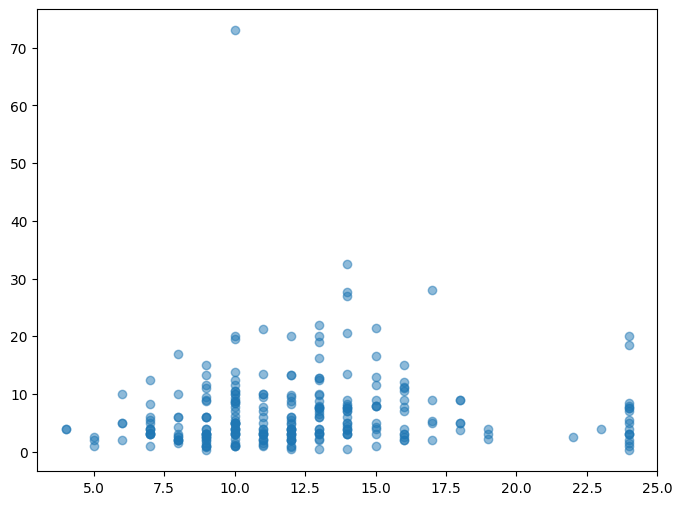

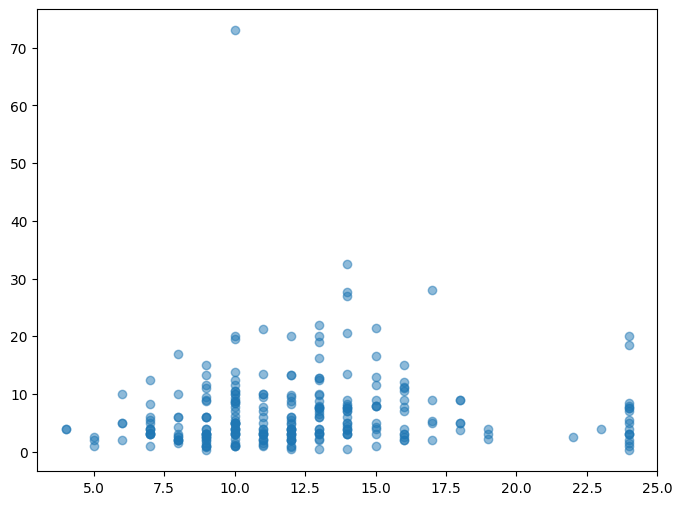

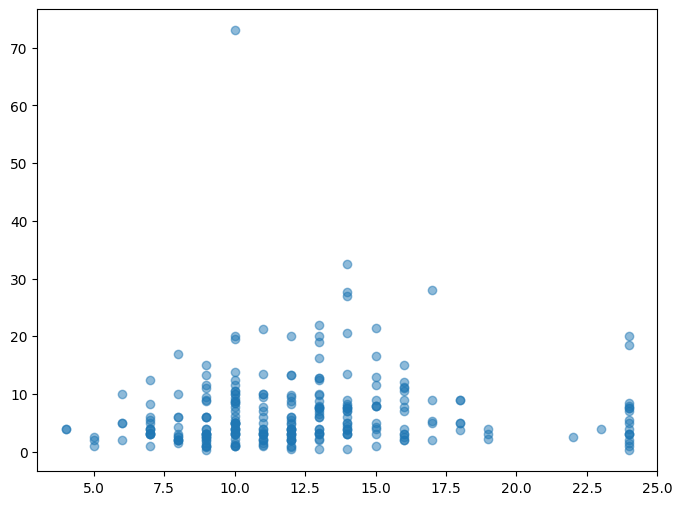

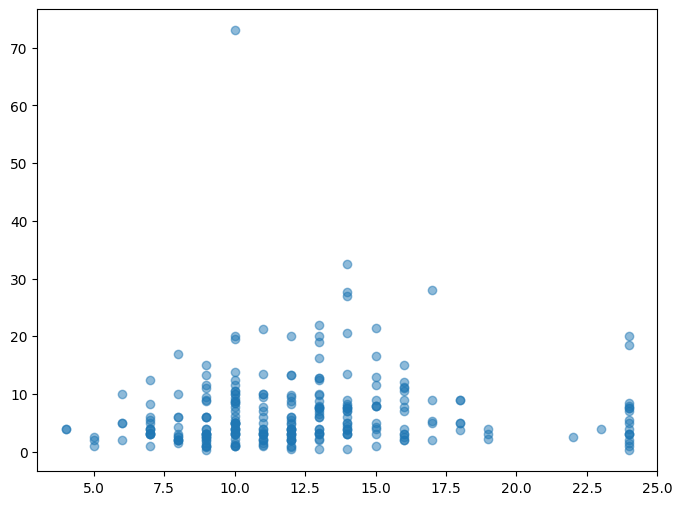

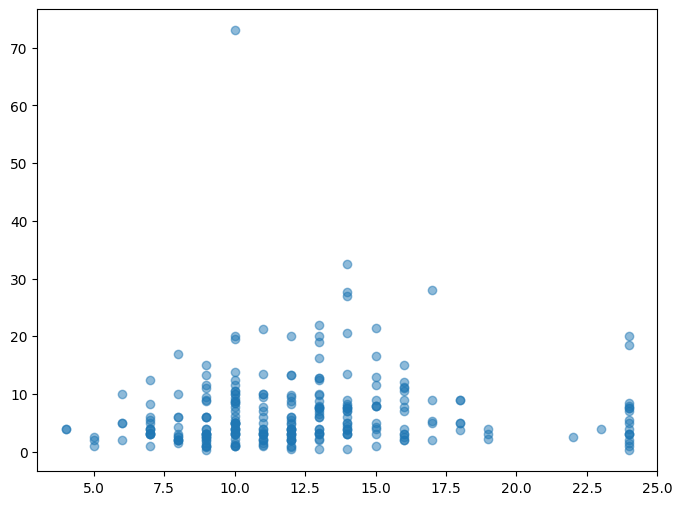

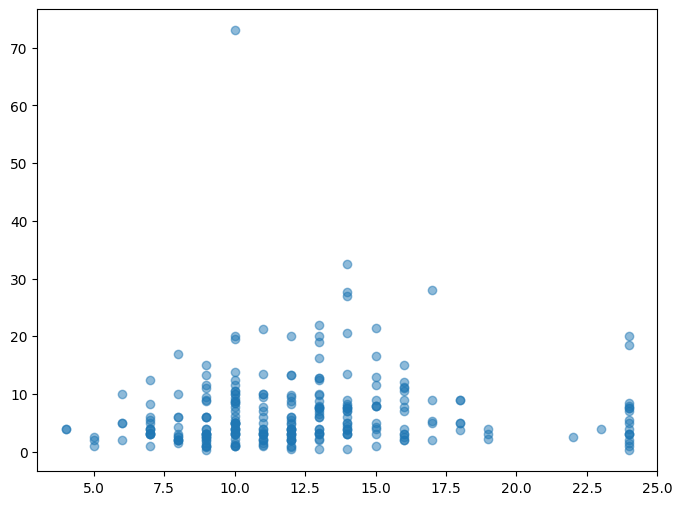

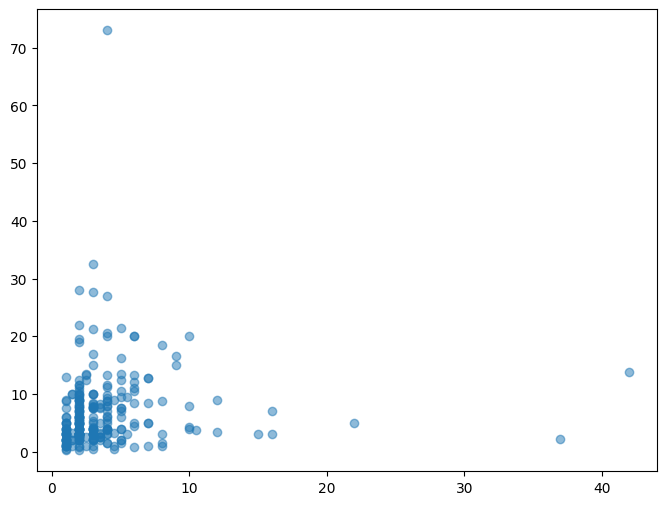

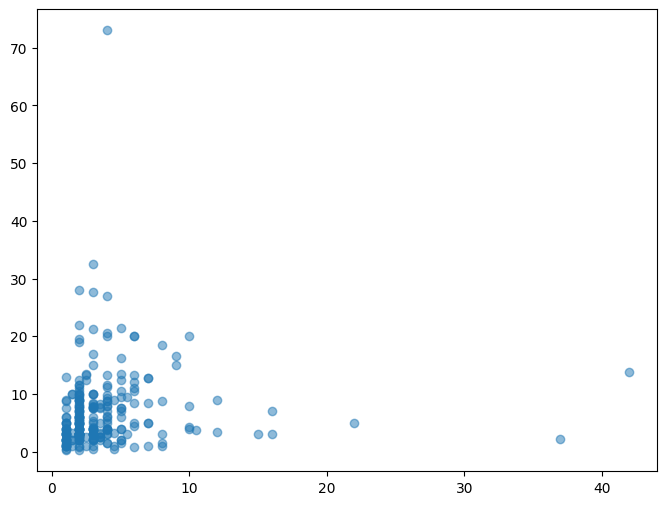

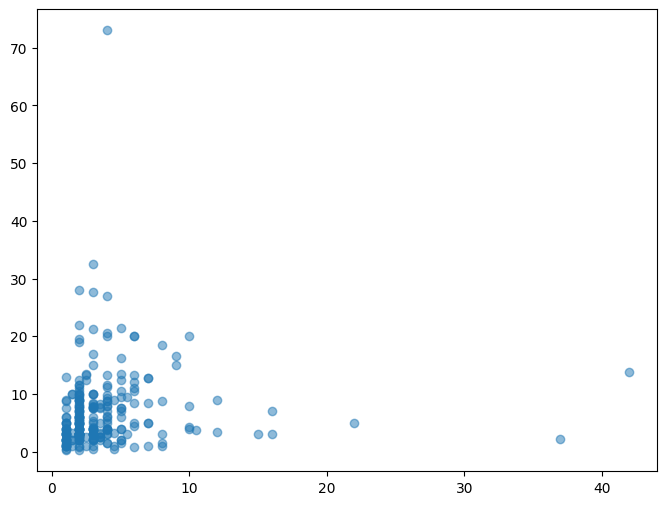

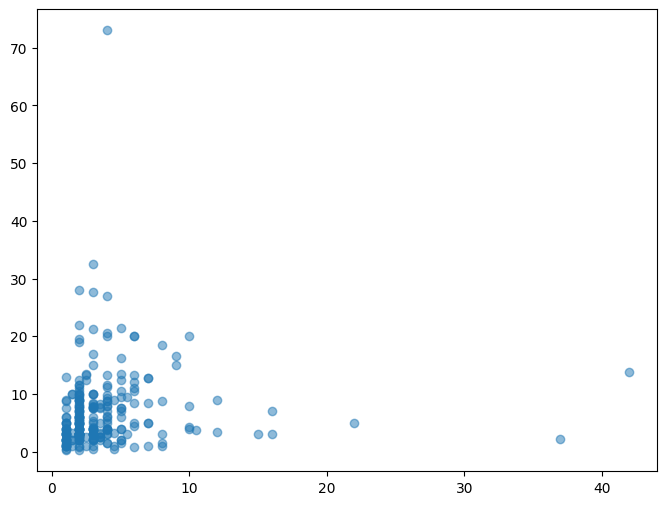

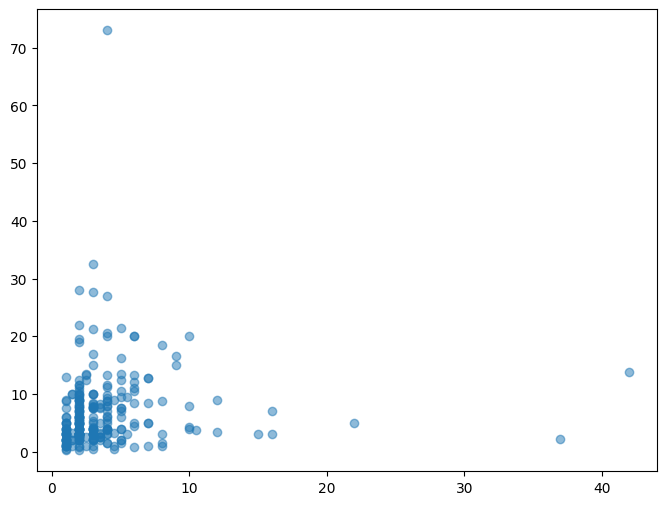

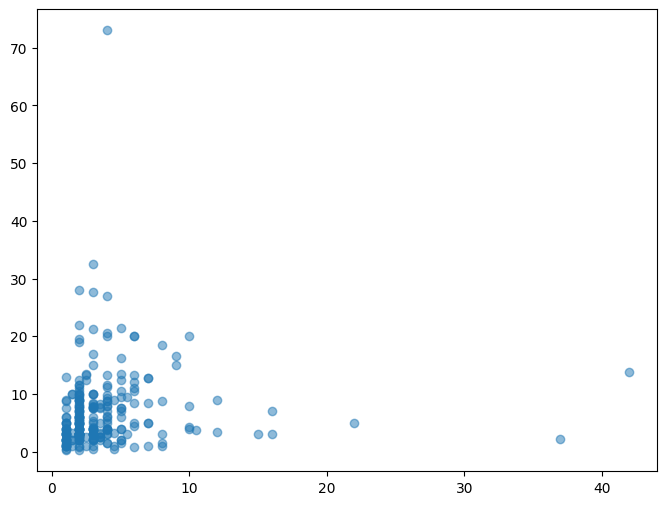

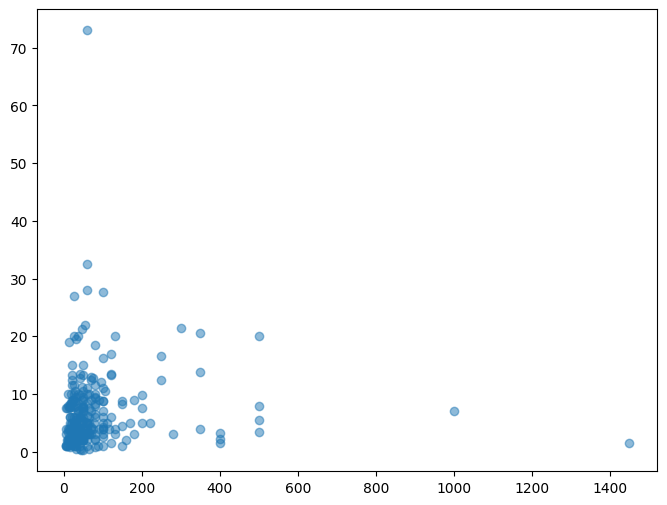

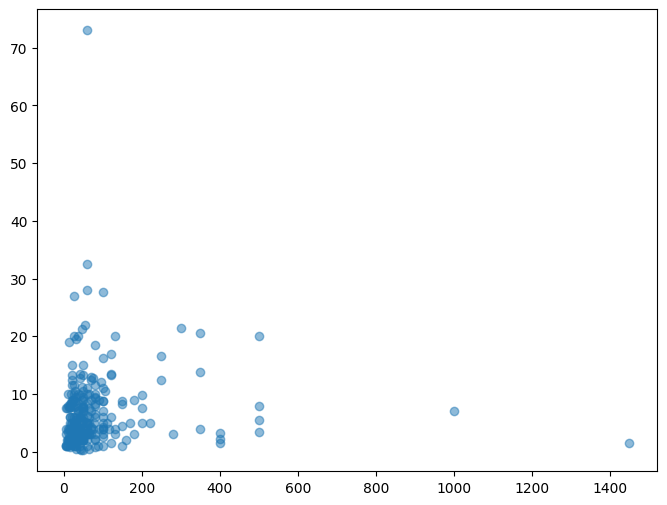

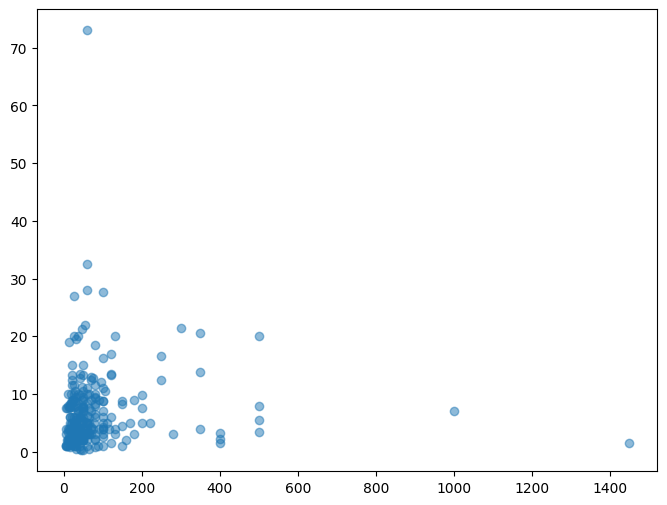

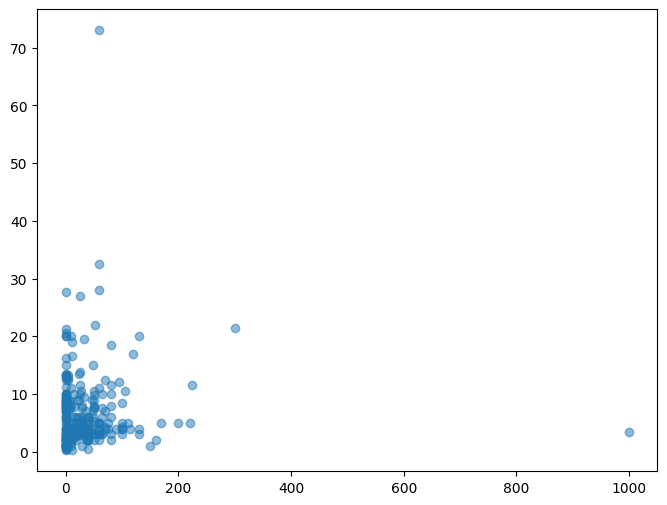

In [163]:
#Plots

import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            
            # Include all selected independent variables in each combination
            X = numeric_fs_df[list(combo)]

            # Fit a robust regression model using Huber loss
            model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
            results = model.fit()

            # Create a scatter plot with regression line
            plt.figure(figsize=(8, 6))
            plt.scatter(X.iloc[:, 0], y, label=f'{combo[0]} vs. Weekly Trips', alpha=0.5)
            
            # Sort X values for plotting the regression line
            sorted_x = np.sort(X.iloc[:, 0])
            predicted_y = results.predict(sorted_x)
            
            plt.plot(sorted_x, predicted_y, color='red', linewidth=2, label='Robust Regression')
            plt.title(f'Scatter Plot of {combo[0]} vs. Weekly Trips with Robust Regression')
            plt.xlabel(combo[0])
            plt.ylabel('Weekly Trips')
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")


In [156]:
# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define your dependent and independent variables
dependent_variable = 'Weekly Trips'
independent_variable = 'Total Employees'

try:
    # Extract data for regression
    y = numeric_fs_df[dependent_variable]
    X = numeric_fs_df[[independent_variable]]

    # Fit a regression model
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()

    # Print summary
    print(results.summary())

    # Access coefficients
    intercept = results.params[0]
    coefficient = results.params[1]

    # Make predictions
    predictions = results.predict()

    # Calculate residuals
    residuals = results.resid

except Exception as e:
    print("An error occurred:", str(e))


                            OLS Regression Results                            
Dep. Variable:           Weekly Trips   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.523
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.113
Time:                        19:49:14   Log-Likelihood:                -883.41
No. Observations:                 266   AIC:                             1771.
Df Residuals:                     264   BIC:                             1778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1107      0.550     

In [157]:
# Define the dependent variable
dependent_variable = 'Weekly Trips'

# Create a list of independent variable names (all columns except the dependent variable)
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Dictionary to store results for each independent variable
results_dict = {}

# Loop through each independent variable
for independent_variable in independent_variables:
    try:
        # Extract data for regression
        y = numeric_fs_df[dependent_variable]
        X = numeric_fs_df[[independent_variable]]

        # Fit a regression model
        model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
        results = model.fit()

        # Store the results in the dictionary
        results_dict[independent_variable] = results

        # Print summary
        print(f"Regression summary for {independent_variable}:")
        print(results.summary())
        print("=" * 40)

    except Exception as e:
        print(f"An error occurred for {independent_variable}: {str(e)}")

# Now, you have regression results for each independent variable in the results_dict


Regression summary for Hours Open:
                            OLS Regression Results                            
Dep. Variable:           Weekly Trips   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.424
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.234
Time:                        19:50:52   Log-Likelihood:                -883.96
No. Observations:                 266   AIC:                             1772.
Df Residuals:                     264   BIC:                             1779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.

In [159]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Variables to store the best model and its R-squared value
best_model = None
best_r_squared = -1  # Initialize with a low value

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a regression model
            model = sm.OLS(y, sm.add_constant(X))
            results = model.fit()

            # Calculate R-squared for the current model
            r_squared = results.rsquared_adj  # Adjusted R-squared

            # Check if the current model has a higher R-squared value
            if r_squared > best_r_squared:
                best_r_squared = r_squared
                best_model = results

                # Print summary for the best model so far
                print(f"Best model (R-squared: {best_r_squared}):")
                print(best_model.summary())
                print("=" * 40)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# The best_model now contains the best model based on the highest R-squared value


Best model (R-squared: 0.001595577917133495):
                            OLS Regression Results                            
Dep. Variable:           Weekly Trips   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.424
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.234
Time:                        19:56:03   Log-Likelihood:                -883.96
No. Observations:                 266   AIC:                             1772.
Df Residuals:                     264   BIC:                             1779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

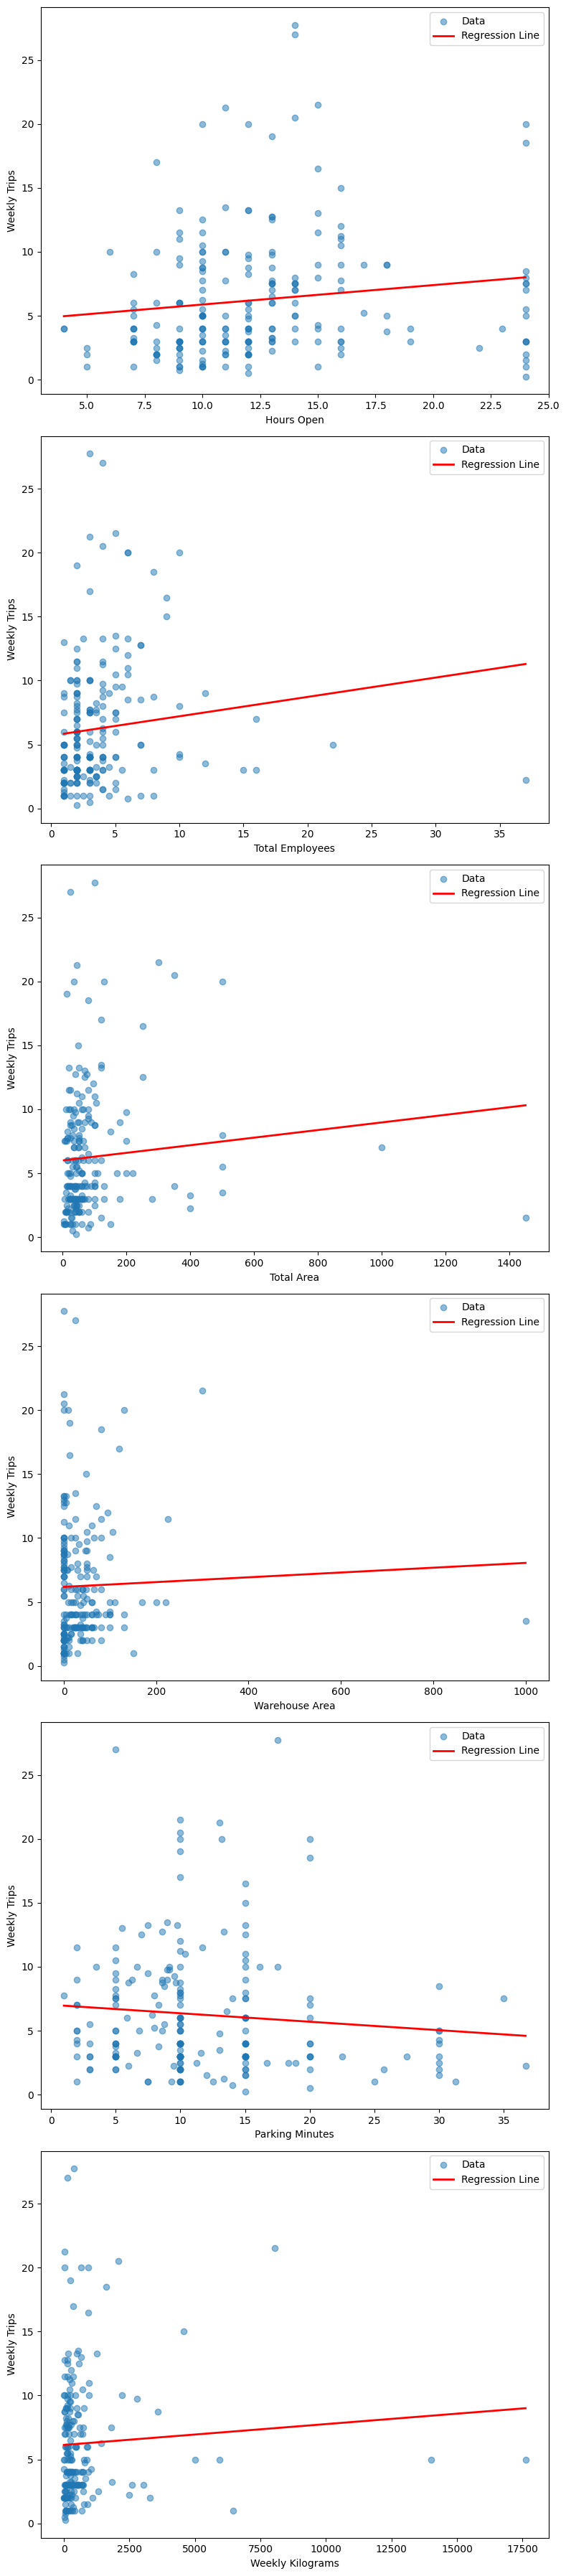

In [109]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# List of independent variables
independent_variables = ['Hours Open', 'Total Employees', 'Total Area', 'Warehouse Area', 'Parking Minutes', 'Weekly Kilograms']

# Initialize an empty dictionary to store results for each variable
results = {}

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(independent_variables), ncols=1, figsize=(8, 6*len(independent_variables)))

# Loop through each independent variable
for i, var in enumerate(independent_variables):
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[var])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients)
    parameter_estimates = model.params

    # Plot the scatterplot
    axes[i].scatter(X_train[var], y_train, label='Data', alpha=0.5)
    
    # Plot the regression line
    x_range = [X_train[var].min(), X_train[var].max()]
    y_range = [parameter_estimates['const'] + parameter_estimates[var] * x for x in x_range]
    axes[i].plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

    # Set labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Weekly Trips')
    axes[i].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


In [112]:
import numpy as np

# Set the threshold for capping outliers
threshold = 3

# Create a copy of the original DataFrame to store the capped values
numeric_fs_df_capped = numeric_fs_df.copy()

# Loop through each column in the DataFrame
for column_name in numeric_fs_df.columns:
    # Calculate z-scores for the current column
    z_scores = (model_df[column_name] - model_df[column_name].mean()) / model_df[column_name].std()
    
    # Identify outliers based on the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Cap the outliers at the threshold value
    numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold


C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold
C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold
C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of independent variables
independent_variables = ['Hours Open', 'Total Employees', 'Total Area', 'Warehouse Area', 'Parking Minutes', 'Weekly Kilograms']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(numeric_fs_df_capped[independent_variables],
                                                    numeric_fs_df_capped['Weekly Trips'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize an empty dictionary to store results for each variable
results = {}

# Loop through each independent variable
for var in independent_variables:
    # Initialize the linear regression model
    model = LinearRegression()

    # Train the model on the training data for the current variable
    model.fit(X_train[[var]], y_train)

    # Make predictions on the testing data for the current variable
    y_pred = model.predict(X_test[[var]])

    # Evaluate the model's performance for the current variable
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results[var] = {'Mean Squared Error': mse, 'R-squared (R2) Score': r2}

# Print the results for each variable
for var, metrics in results.items():
    print(f"Results for '{var}':")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared (R2) Score: {metrics['R-squared (R2) Score']}")
    print()

Results for 'Hours Open':
Mean Squared Error: 27.361277031071044
R-squared (R2) Score: -0.024571345116268795

Results for 'Total Employees':
Mean Squared Error: 27.045831295814832
R-squared (R2) Score: -0.012759152983729427

Results for 'Total Area':
Mean Squared Error: 27.6745128081891
R-squared (R2) Score: -0.03630078307839102

Results for 'Warehouse Area':
Mean Squared Error: 26.896756417580352
R-squared (R2) Score: -0.00717688983342768

Results for 'Parking Minutes':
Mean Squared Error: 26.40289598365832
R-squared (R2) Score: 0.011316225400506918

Results for 'Weekly Kilograms':
Mean Squared Error: 27.093664234276655
R-squared (R2) Score: -0.014550306885100284



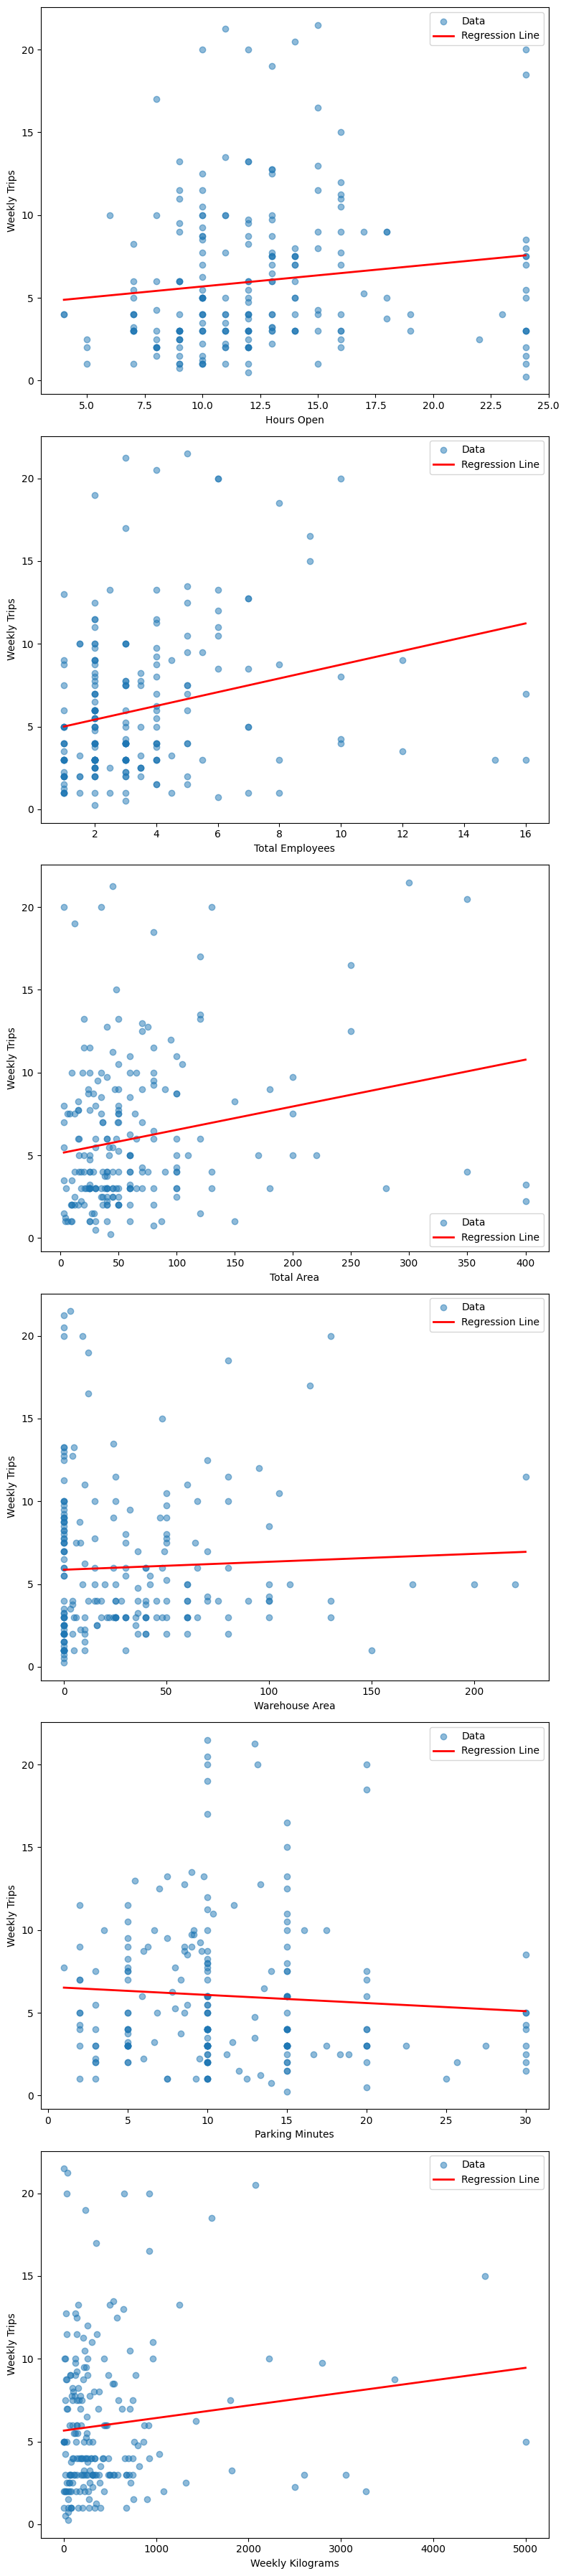

In [121]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# List of independent variables
independent_variables = ['Hours Open', 'Total Employees', 
                         'Total Area', 'Warehouse Area', 
                         'Parking Minutes', 'Weekly Kilograms']

# Initialize an empty dictionary to store results for each variable
results = {}

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(independent_variables), ncols=1, figsize=(8, 6*len(independent_variables)))

# Loop through each independent variable
for i, var in enumerate(independent_variables):
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[var])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients)
    parameter_estimates = model.params

    # Plot the scatterplot
    axes[i].scatter(X_train[var], y_train, label='Data', alpha=0.5)
    
    # Plot the regression line
    x_range = [X_train[var].min(), X_train[var].max()]
    y_range = [parameter_estimates['const'] + parameter_estimates[var] * x for x in x_range]
    axes[i].plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

    # Set labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Weekly Trips')
    axes[i].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

# Stata commands

In [42]:
import subprocess

# Example: Execute a Stata command from Python
command = "stata -b do your_stata_script.do"
subprocess.call(command, shell=True)


1

<Axes: xlabel='Count', ylabel='Viajes semanales'>

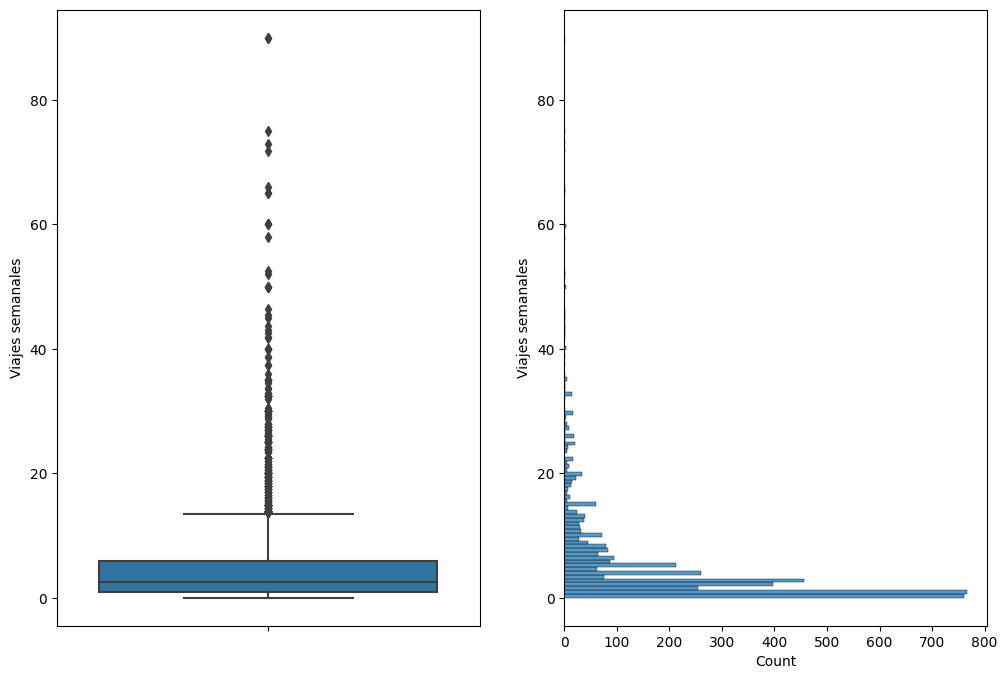

In [43]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y='Viajes semanales',data=df, ax=ax[0])
sns.histplot(y='Viajes semanales',data=df, ax=ax[1])